**Imports**

In [2]:
import pandas as pd
import os 
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt 
import pytz
import seaborn as sns
from random import shuffle
from tsai.all import *
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix



**Loading annotated data**

In [3]:
data_folder = '/scratch/smartairsense/data_annotated'

prqt_file1 = os.path.join(data_folder,'annotated-office.parquet')
prqt_file2 = os.path.join(data_folder,'2022-week39.parquet')
prqt_file3 = os.path.join(data_folder,'2022-week40.parquet')
prqt_file4 = os.path.join(data_folder,'2022-week41.parquet')
prqt_file5 = os.path.join(data_folder,'2022-week42.parquet')
prqt_file6 = os.path.join(data_folder,'2022-week43.parquet')

In [4]:
data1 = pd.read_parquet(prqt_file1 , engine='fastparquet')
data2 = pd.read_parquet(prqt_file2 , engine='fastparquet')
data3 = pd.read_parquet(prqt_file3 , engine='fastparquet')
data4 = pd.read_parquet(prqt_file4 , engine='fastparquet')
data5 = pd.read_parquet(prqt_file5 , engine='fastparquet')
data6 = pd.read_parquet(prqt_file6 , engine='fastparquet')
data = concat(data1,data2,data3,data4,data5,data6)
data.columns=data1.columns
print(f'data shape: {data.shape}')
data

data shape: (44106, 23)


oxygen      pm10     co  temperature    co2    so2    no2       pm1  \
0      21.561  1.272727    NaN       26.817  446.5    NaN    NaN  0.000000   
1      21.476  0.644313    NaN       26.869  439.3    NaN    NaN  0.000000   
2      21.377  0.305622    NaN       26.994  438.1    NaN    NaN  0.000000   
3      21.275  0.144968    NaN       27.180  438.2    NaN    NaN  0.000000   
4      21.176  0.068764    NaN       27.399  436.5    NaN    NaN  0.000000   
...       ...       ...    ...          ...    ...    ...    ...       ...   
44101  20.876  2.053462  1.770       22.861  478.4 -30.07  24.49  1.330274   
44102  20.879  2.696659  1.770       22.859  478.9 -30.17  24.44  1.723195   
44103  20.877  2.313910  1.770       22.856  479.0 -30.16  24.55  1.658417   
44104  20.878  2.186051  1.770       22.853  479.4 -30.27  24.58  1.707657   
44105  20.879  2.238261  1.769       22.851  479.7 -30.45  24.61  1.639240   

        dewpt      timestamp  ...     o3  humidity  person  window_open  \
0      18.395  1656934772000  ...    NaN    59.247       0            0   
1      18.361  1656934836000  ...    NaN    58.934       0            0   
2      18.417  1656934929000  ...    NaN    58.709       0            0   
3      18.513  1656935039000  ...    NaN    58.424       0            0   
4      18.615  1656935149000  ...    NaN    58.050       0            0   
...       ...            ...  ...    ...       ...     ...          ...   
44101  13.696  1667173680000  ...  17.39    55.583       0            0   
44102  13.694  1667173799000  ...  17.39    55.583       0            0   
44103  13.692  1667173918000  ...  17.40    55.585       0            0   
44104  13.689  1667174041000  ...  17.48    55.584       0            0   
44105  13.687  1667174162000  ...  17.52    55.584       0            0   

       humidity_abs     sound     pm2_5                  datetime  \
0            15.166  37.53181  1.181818 2022-07-04 11:39:32+00:00   
1            15.129  29.72356  0.539171 2022-07-04 11:40:36+00:00   
2            15.176  25.12963  0.255750 2022-07-04 11:42:09+00:00   
3            15.259  22.44486  0.121312 2022-07-04 11:43:59+00:00   
4            15.345  24.49194  0.057543 2022-07-04 11:45:49+00:00   
...             ...       ...       ...                       ...   
44101        11.384  24.44430  1.533610 2022-10-30 23:48:00+00:00   
44102        11.383  24.60689  2.125683 2022-10-30 23:49:59+00:00   
44103        11.381  24.62165  2.026718 2022-10-30 23:51:58+00:00   
44104        11.379  24.86741  2.009216 2022-10-30 23:54:01+00:00   
44105        11.378  24.49119  2.039877 2022-10-30 23:56:02+00:00   

                               deviceid  h2s  
0      a2055772251a41b9f8bd24c66b89a09b  NaN  
1      a2055772251a41b9f8bd24c66b89a09b  NaN  
2      a2055772251a41b9f8bd24c66b89a09b  NaN  
3      a2055772251a41b9f8bd24c66b89a09b  NaN  
4      a2055772251a41b9f8bd24c66b89a09b  NaN  
...                                 ...  ...  
44101  a2055772251a41b9f8bd24c66b89a09b  NaN  
44102  a2055772251a41b9f8bd24c66b89a09b  NaN  
44103  a2055772251a41b9f8bd24c66b89a09b  NaN  
44104  a2055772251a41b9f8bd24c66b89a09b  NaN  
44105  a2055772251a41b9f8bd24c66b89a09b  NaN  

[44106 rows x 23 columns]

**Encode target classes (person and window open) classes**

In [5]:
df = data.copy()
le = LabelEncoder()
labels = ['person','window_open']
for label in labels:
    le.fit(df[label])
    df[label]=le.transform(df[label])
    print(df[label].value_counts())

print(df.shape)

0    41876
1     2038
2      189
4        2
3        1
Name: person, dtype: int64
0    42801
1     1305
Name: window_open, dtype: int64
(44106, 23)


**select some columns to plot**

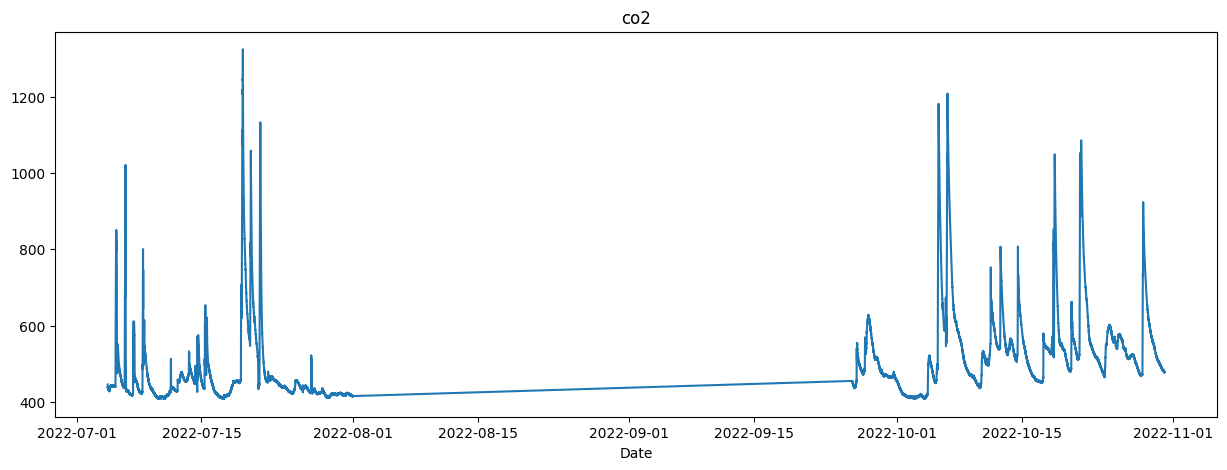

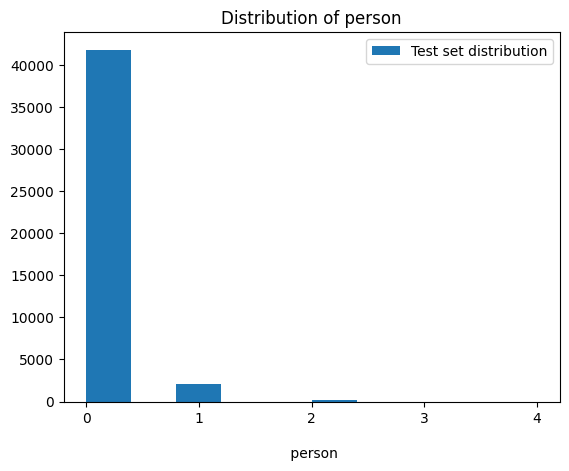

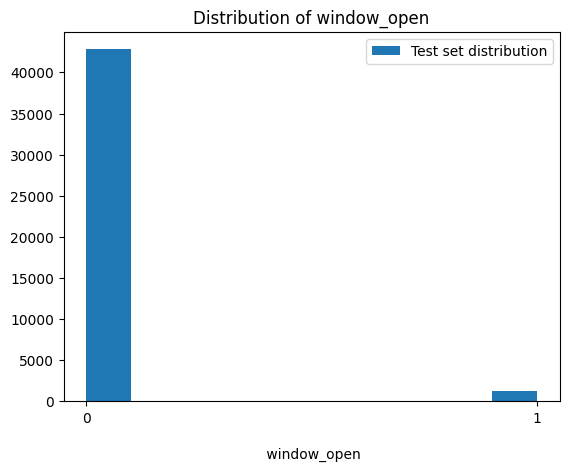

In [6]:
plot_cols = ['oxygen', 'co2','person','window_open']
x = df.datetime

# plot o2 and co2 
for col in plot_cols[0:2]:
    fig = plt.figure(figsize=(15,5))
    plt.plot(x, df[col])
    plt.xlabel('Date')
    plt.title(col)
#plot distribution of number of persons and window open
for col in plot_cols[2:]:
    fig = plt.figure()
    plt.hist(df[col],label='Test set distribution')
    plt.xlabel(f'\n {col}')
## Ticket labels - List must be in ascending order
    plt.xticks(df[col].unique()) ### names of classes starting from 0
    #sns.distplot(df[col], bins=100, kde=False)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()
    # plt.figure()
    # df[col].value_counts().plot.pie(autopct='%0.2f')



**plot scaled data in one figure**

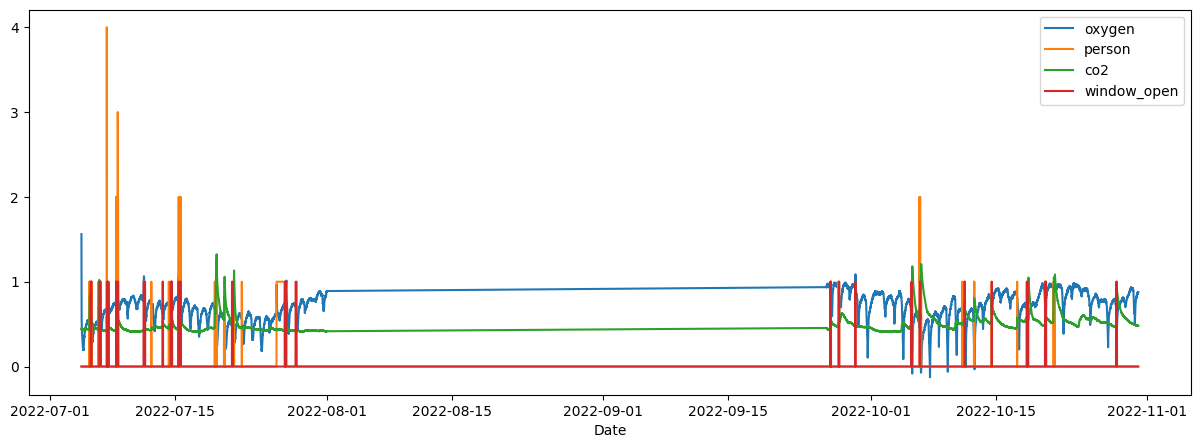

In [7]:
x = df.datetime
fig = plt.figure(figsize=(15,5))

plt.xlabel('Date')
plt.plot(x, df['oxygen']-20,label='oxygen')
plt.plot(x, df['person'],label='person')
plt.plot(x, df['co2']/1000,label='co2')
plt.plot(x, df['window_open'], label='window_open' )
plt.legend()


**filtering data**

In [8]:
# h2s column has only NaN values, also drop timestamp,datetime,deviceid
df.drop(columns=['h2s','timestamp','deviceid','datetime'],inplace=True)




**Missing values, drop NAN**

In [9]:
missing = df.isnull().sum(0).reset_index()
missing.columns = ['column', 'count']
missing = missing.sort_values(by = 'count', ascending = False).loc[missing['count'] > 0]
missing['percentage'] = missing['count'] / float(df.shape[0]) * 100
ind = np.arange(missing.shape[0])
fig, ax = plt.subplots()
rects = ax.barh(ind, missing.percentage.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(missing.column.values, rotation='horizontal')
ax.set_xlabel("Precentage of missing values %")
plt.show()
print ('maximum number of missing values per column= ',missing['count'].max(),'\n')
print(missing)


#### substitute NaN values with mean 
## polynomial interpolation with degree > 1 uses index, also convert dtype to float to work

df.reset_index(drop=True,inplace=True)
df.interpolate(method='polynomial', order=1,inplace=True)

## incase NaNs are at begining or end we drop those rows

df.dropna(axis=0,inplace=True)







maximum number of missing values per column=  20 

   column  count  percentage
5     so2     20    0.045345
6     no2     20    0.045345
12     o3     20    0.045345
2      co     14    0.031742
9    tvoc      1    0.002267


**minimized dataset for our classification task, normalize features**

In [10]:

print(df['person'].value_counts(),'\n',df['window_open'].value_counts(),'\n')

#### remove rows with 3 (one row) and 4 person (2 rows)
lc = df.loc[lambda x: x['person'] == 3]
df.drop(lc.index,inplace=True)

lc = df.loc[lambda x: x['person'] == 4]
df.drop(lc.index,inplace=True)

df['person'].value_counts(),df['window_open'].value_counts()

### Normalize data
normalization = 0
targets = df.filter(['person','window_open'])
features = df.drop(columns=['person','window_open']) 
if normalization == 1: #standard
    features_norm=(features-features.mean())/features.std()
elif normalization == 2: #minmax
    features_norm=(features-features.min())/(features.max()-features.min()) 
else:
    features_norm = features.copy()

### minimized data

df_mini = df.filter(['sound','tvoc','person','window_open'])
print(df_mini.shape,'\n',df_mini['person'].value_counts(),'\n',df_mini['window_open'].value_counts(),'\n')

features_mini = features_norm.filter(['sound','tvoc'])
print(targets.iloc[:,0].value_counts())




0    41856
1     2038
2      189
4        2
3        1
Name: person, dtype: int64 
 0    42781
1     1305
Name: window_open, dtype: int64 

(44083, 4) 
 0    41856
1     2038
2      189
Name: person, dtype: int64 
 0    42779
1     1304
Name: window_open, dtype: int64 

0    41856
1     2038
2      189
Name: person, dtype: int64


**Correlation Matrix, drop highly correlated features**

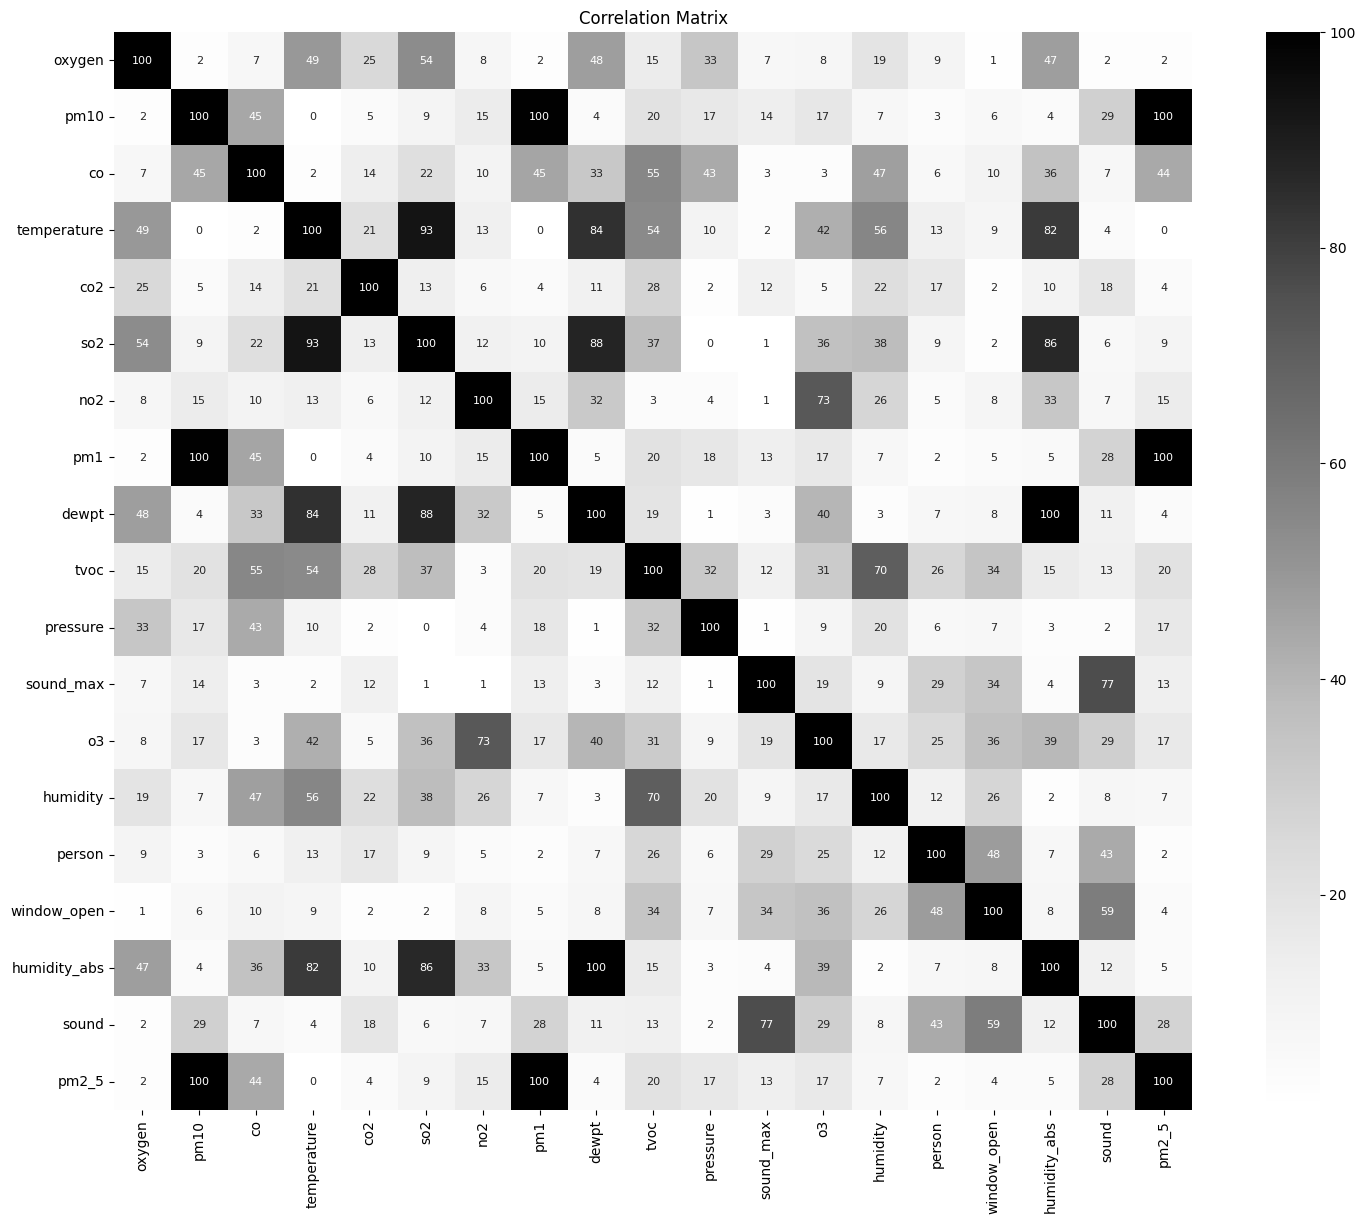

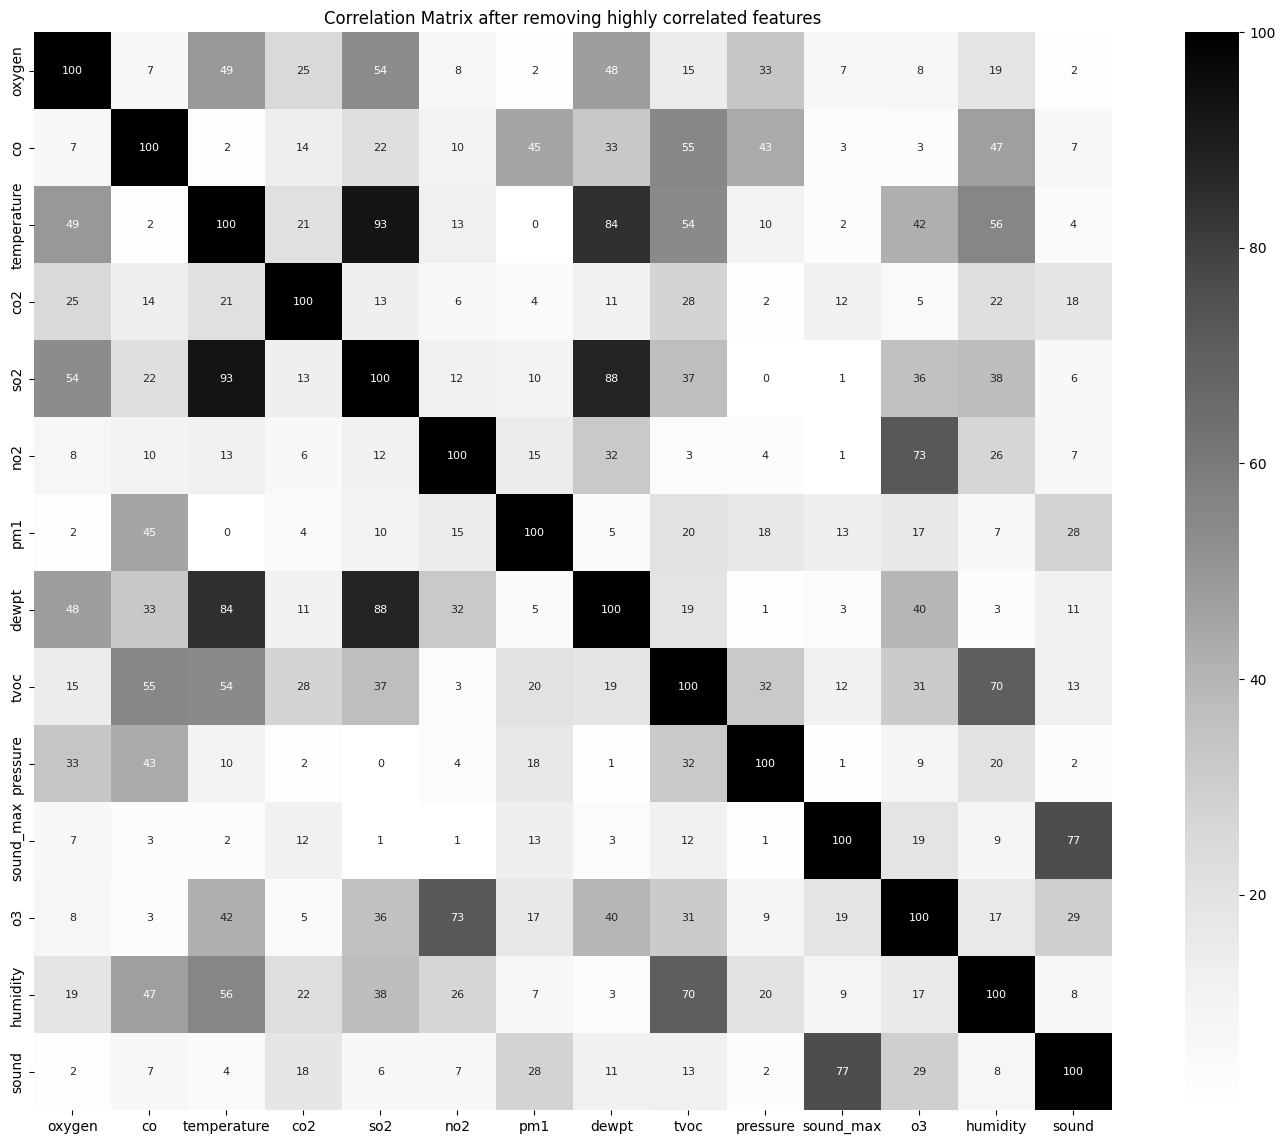

In [11]:
corr = df.corr(min_periods=1000)
high_corr = np.abs(corr)*100
f, ax = plt.subplots(figsize=(19,14))
sns.heatmap(high_corr, cbar=True,annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8},cmap='Greys')
plt.title('Correlation Matrix')
plt.show()

### drop 100% correlated features

remove_list = ['pm10','pm2_5','humidity_abs']
features.drop(columns=remove_list,inplace=True)
features_norm.drop(columns=remove_list,inplace=True)

corr = features.corr(min_periods=1000)
high_corr = np.abs(corr)*100
f, ax = plt.subplots(figsize=(19,14))
sns.heatmap(high_corr, cbar=True,annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8},cmap='Greys')
plt.title('Correlation Matrix after removing highly correlated features')
plt.show()


**sliding over data**

In [12]:
def sliding(window,stride,features,targets,start=0):

    x = []
    y = []
    count = 0
    i=start
    length = window + i
    size = features.shape[0]
    while  length <= size :
        x.append(features.iloc[i:i+window].values.tolist())
        y.append(targets.iloc[i])
        i += stride
        length = window + i
        count += 1
    x = np.array(x,dtype=np.float32)#.reshape((count,features.shape[1], window))
    x = np.transpose(x, (0, 2, 1))
    y = np.array(y,dtype=np.int)#reshape(-1)
    return x,y

#### Grouping 0,1,2,... and stitching then slicing (destroys time series !!!)
# def sliding(window,stride,features,target):

#     df = pd.concat([features,target],axis=1)
#     df_g = df.groupby(df.columns[-1])

#     x=[]
#     y=[]
#     count = 0

#     for key, item in df_g:
#             i = 0
#             length = window
#             size = df_g.get_group(key).shape[0]
#             while  length <= size :
#                 x.append(df_g.get_group(key).iloc[i:i+window,0:-1].values.tolist())
#                 y.append(df_g.get_group(key).iloc[0,-1])
#                 i += stride
#                 length = window + i
#                 count += 1
#     x = np.array(x,dtype=np.float32)#.reshape((count,features.shape[1], window))
#     x = np.transpose(x, (0, 2, 1))
#     y = np.array(y,dtype=np.int)#reshape(-1)
#     return x,y

In [13]:
#### testing sliding

# _features = pd.DataFrame({'x': [0,1,2,3,4,5,6,7,8,9],'z': [0,1,2,3,4,5,6,7,8,9]})
# _targets = pd.DataFrame({'y': [0,0,1,1,1,0,1,1,0,0],'m': [2,2,2,3,3,2,3,2,3,2]}) 
# # df3 = pd.concat([_features,_targets],axis=1)
# # _x,_y= SlidingWindow(3,2,get_x=[0,1],get_y=[2,3],horizon = 3)(df3)
# _x,_y = sliding(3,2,_features,_targets)
# print(_x.shape,_y.shape,_x,_y)

In [14]:
window = 15
stride = 2

# reset index 
# df_mini.reset_index(drop=True)
# features_mini.reset_index(drop=True)
# targets.reset_index(drop=True)
#t = df_mini.values
#X, y = SlidingWindow(window_len=window , stride = stride, get_x = [0,1], get_y = [2])(df_mini)
X,y = sliding(window,stride,features_mini,targets.iloc[:,-2])
X.shape, y.shape


((22035, 2, 15), (22035,))

**Splitting data, standardaize, get dataloaders**

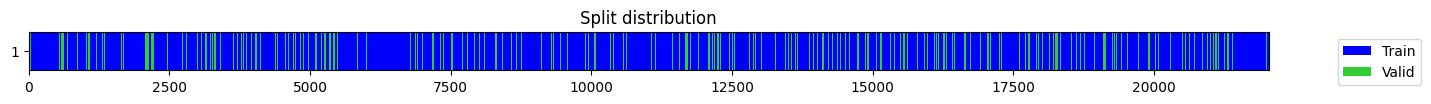

          sound    tvoc  person  window_open
20     21.70313  2320.0       0            0
21     23.57181  2316.0       0            0
22     21.06619  2311.0       0            0
23     23.23221  2318.0       0            0
24     23.39492  2315.0       0            0
...         ...     ...     ...          ...
44101  24.44430  2679.0       0            0
44102  24.60689  2680.0       0            0
44103  24.62165  2676.0       0            0
44104  24.86741  2674.0       0            0
44105  24.49119  2675.0       0            0

[44083 rows x 4 columns]


(tensor([[  21.7031,   23.5718,   21.0662,   23.2322,   23.3949,   22.4872,
            21.9438,   24.1180,   21.1044,   20.6614,   18.9092,   20.7001,
            21.8664,   21.1510,   21.6657],
         [2320.0000, 2316.0000, 2311.0000, 2318.0000, 2315.0000, 2317.0000,
          2320.0000, 2318.0000, 2309.0000, 2307.0000, 2306.0000, 2309.0000,
          2298.0000, 2295.0000, 2297.0000]]),
 TensorCategory(0))

In [15]:

# splits = TimeSplitter()(y)
splits = TrainValidTestSplitter()(y)
tfms  = [ToFloat(), TSClassification()] 
batch_tfms = TSStandardize()
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)

dls = get_ts_dls(X, y, tfms=tfms,splits=splits, batch_tfms=batch_tfms, bs=32)
plot_splits(splits)
print(df_mini)
dsets[0][0].data, dsets[0][1].data

In [16]:
print(X[splits[0][0]])

[[  19.58777   19.87243   19.93155   19.30822   18.89456   18.47159
    19.56212   19.63034   19.35601   19.04357   18.13666   18.24692
    18.54509   18.90701   18.85349]
 [2361.      2360.      2362.      2369.      2367.      2363.
  2357.      2353.      2348.      2348.      2359.      2357.
  2360.      2358.      2353.     ]]


**Training and validation**

In [17]:

learn = TSClassifier(X, y, splits=splits, lr = 1e-5, arch=InceptionTimePlus, arch_config=dict(depth=4,act=nn.ReLU,fc_dropout=.5), batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())

learn.fit_one_cycle(10)
learn.export("models/learn.pkl")

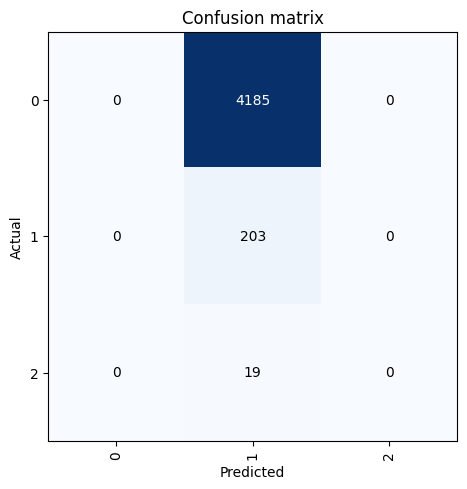

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
print(interp)
interp.plot_confusion_matrix()

**Ploting Confusion Matrix**


In [22]:
def plot_confusion(y_true,y_pred,n_classes):
    cf_matrix=confusion_matrix(y_true,y_pred)


    plt.figure()

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(n_classes,n_classes)  # 2: number of classes

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',cbar = False)
    ax.set_title('Confusion Matrix\n');
    ax.set_xlabel('\nPredicted Classes')
    ax.set_ylabel('Actual Classes ');

## Ticket labels - List must be in alphabetical order
    # ax.xaxis.set_ticklabels(['Not Setting','Setting']) ### names of classes starting from 0
    # ax.yaxis.set_ticklabels(['Not Setting','Setting'])

## Display the visualization of the Confusion Matrix.
    plt.show()

**SMOTE Oversampling (destroys the time series !!!)**

In [22]:
# from imblearn.over_sampling import SMOTE,KMeansSMOTE
# from sklearn.model_selection import train_test_split

# ##### NOTE THE SHUFFLE AND TIME SERIES
# x_train, x_valid, y_train, y_valid = train_test_split(df_mini.iloc[:,0:-1], df_mini.iloc[:,-1], test_size=0.2, shuffle=False)

# print(y_train.value_counts())
# ### get array of dataset train and target

# # train = to_np(dsets.train[:][0])
# # tar = to_np(dsets.train[:][1])
# # print(tar.shape,train.shape)


# ### Apply SMOTE only on train dataset to avoid data leakage
# sm = SMOTE(random_state=42,sampling_strategy={1:20000,2:10000})

# x_res, y_res = sm.fit_resample(x_train, y_train)
# print(y_res.value_counts())

# ### create sliding windows
# x_train,y_train = sliding(window,stride,x_res,y_res)
# x_valid,y_valid = sliding(window,stride,x_valid,y_valid)
# print(x_train.shape,y_train.shape,x_valid.shape,y_valid.shape)



**Evaluate**

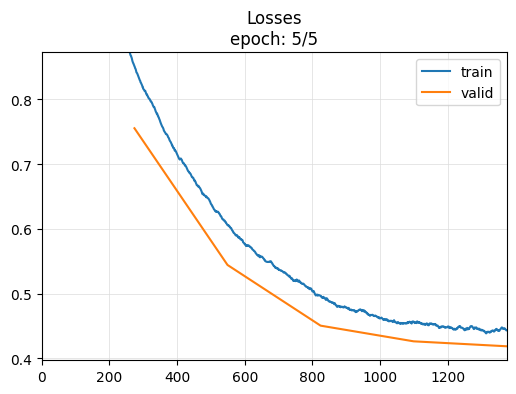

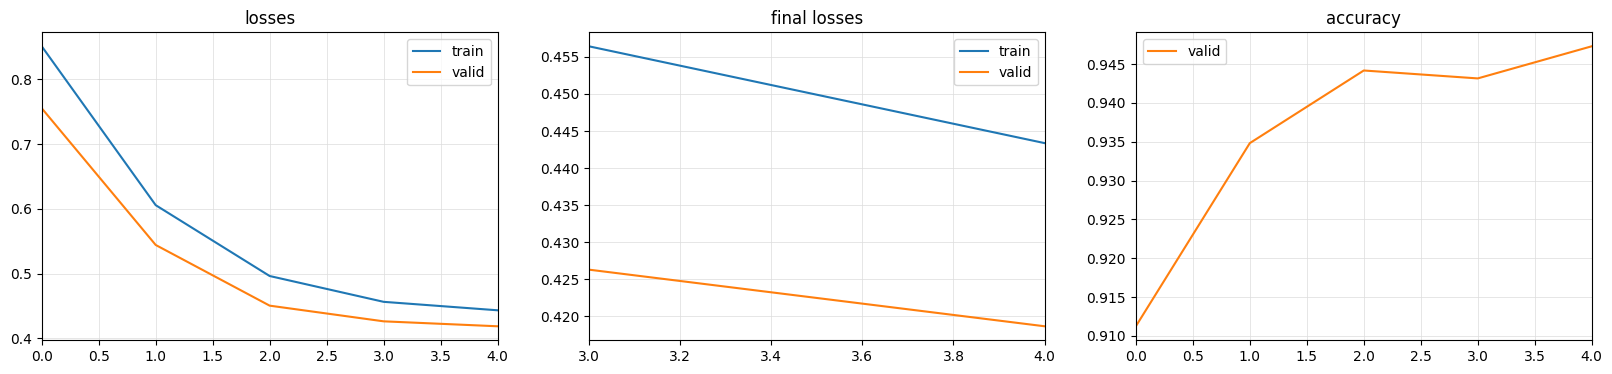

In [24]:
### create TSdatasets for training and validation
### important for classification

# splits = TimeSplitter()(y)
splits = TrainValidTestSplitter()(y)
tfms  = [None, TSClassification()] 
tsets = TSDatasets(X[splits[0]], y[splits[0]], tfms=tfms) #train dataset
vsets = TSDatasets(X[splits[0]], y[splits[0]], tfms=tfms) #valid dataset
batch_tfms = TSStandardize()
dls   = TSDataLoaders.from_dsets(tsets, vsets , batch_tfms=batch_tfms, bs= 64)
model = InceptionTimePlus(dls.vars,dls.c,depth = 4,fc_dropout=0.5)
learn = ts_learner(dls, model, lr = 1e-5 , metrics=accuracy,cbs = ShowGraph())
learn.fit_one_cycle(5)

##### save and load pkl model
# learn.export('models/learn.pkl')
# learn = load_learner('models/learn.pkl')

**EVALUATION ON TEST DATA SET**

In [27]:
#### Adding dataset to apply same dls valid tfms on test

test_ds = dls.valid.dataset.add_test(X[splits[1]], y[splits[1]]) #X and y would be your test data (segmented)
test_dl = dls.valid.new(test_ds)
next(iter(test_dl))

#### evaluating

test_probas, test_targets, test_preds = learn.get_preds(dl=test_dl, with_decoded=True)#,reorder = False)
print(f'Accuracy: {(test_targets == test_preds).float().mean():0.5f}')

### number of classes in validation set
n_classes = pd.DataFrame(test_targets).value_counts().shape[0]
print(n_classes)
plot_confusion(test_targets,test_preds,n_classes)

Accuracy: 0.94894
3


In [98]:
model.state_dict

<bound method Module.state_dict of FCN(
  (convblock1): ConvBlock(
    (0): Conv1d(2, 128, kernel_size=(7,), stride=(1,), padding=(3,), bias=False)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (convblock2): ConvBlock(
    (0): Conv1d(128, 256, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (convblock3): ConvBlock(
    (0): Conv1d(256, 128, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (gap): GAP1d(
    (gap): AdaptiveAvgPool1d(output_size=1)
    (flatten): fastai.layers.Flatten(full=False)
  )
  (fc): Linear(in_features=128, out_features=3, bias=True)
)>

In [94]:
m=np.array(learn.recorder.values)
m.shape
import matplotlib.pyplot as plt

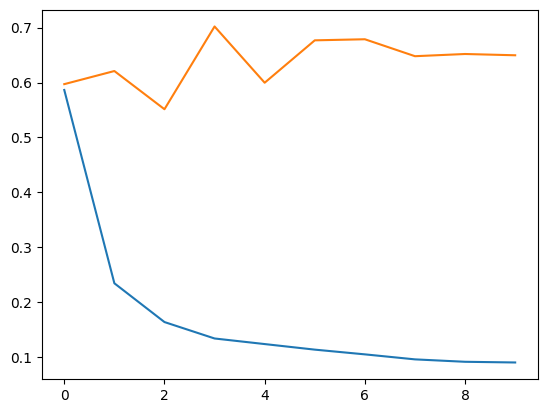

In [95]:
plt.figure()
plt.plot(m[:,0])
plt.plot(m[:,1])
plt.show()

In [40]:
import optuna
from optuna.integration import FastAIPruningCallback

num_epochs = 5
num_optuna_trials = 50
    
def objective(trial:optuna.Trial):
    # Define search space here. Supported search space are 
    #num_filters = trial.suggest_categorical('num_filters', [32, 64, 96, 128]) 
    #dropout_rate = trial.suggest_float("dropout_rate", 0.0, 1.0)
    lr = trial.suggest_float("Learning_rate", 1e-8, 1e-6, log=True)
    
    mv_clf = TSClassifier(X, y, splits=splits,lr =  lr, path='models', arch=InceptionTimePlus, arch_config=dict(depth=4,act=nn.ReLU, fc_dropout=0.5), batch_tfms=batch_tfms, metrics=accuracy, cbs=[ShowGraph(),FastAIPruningCallback(trial)])

    
    mv_clf.fit_one_cycle(num_epochs, lr_max=1e-3)
            
    # return the valid_loss - learn.recorder.values returns [[train_loss, valid_loss, acc]]
    return mv_clf.recorder.values[-1][1]

[I 2022-11-04 00:18:42,183] A new study created in memory with name: no-name-c9548514-ea12-4420-a72e-7e69859c97cc


  0%|          | 0/50 [00:00<?, ?it/s]

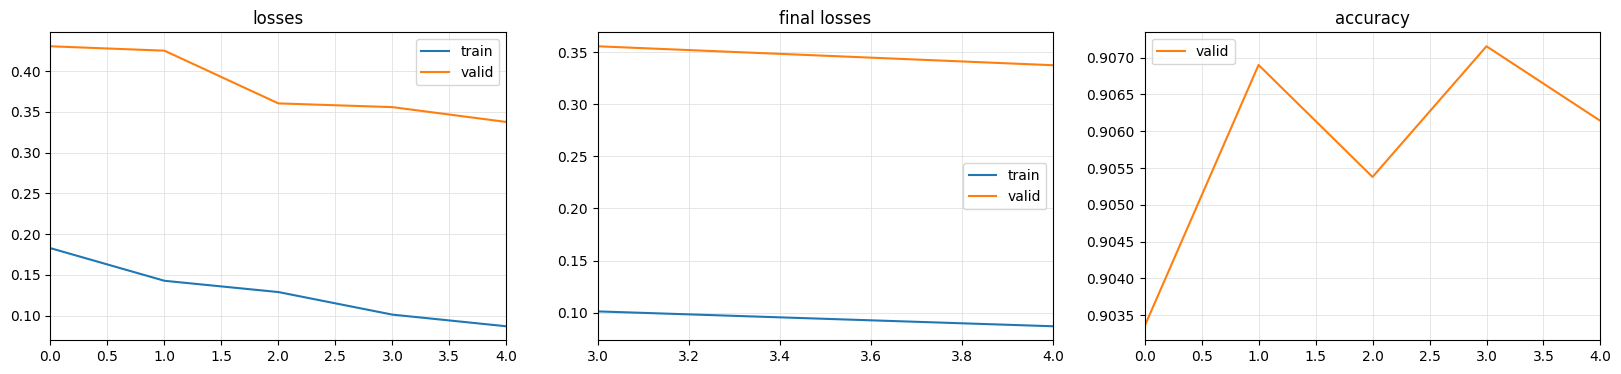

[I 2022-11-04 00:18:48,872] Trial 0 finished with value: 0.3374533951282501 and parameters: {'Learning_rate': 7.132970607098331e-07}. Best is trial 0 with value: 0.3374533951282501.


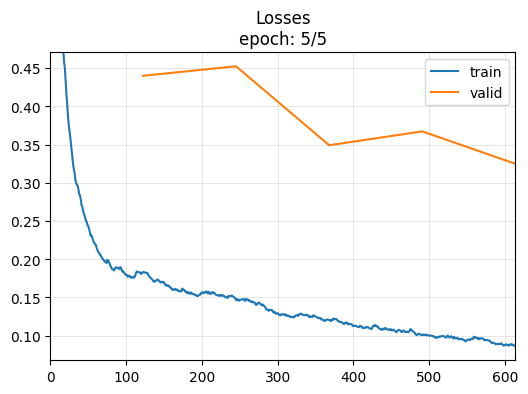

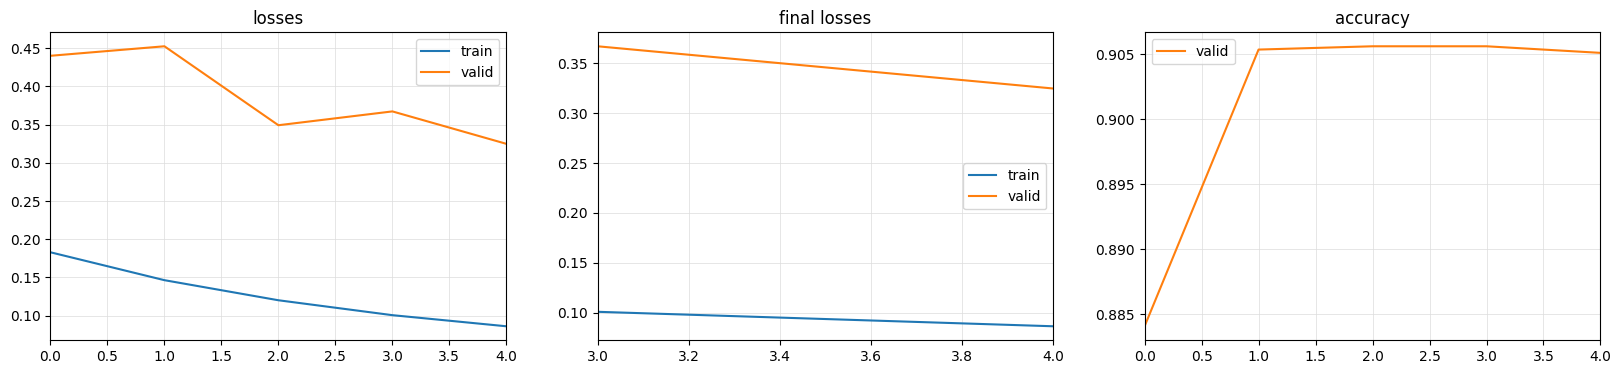

[I 2022-11-04 00:18:56,740] Trial 1 finished with value: 0.3247813880443573 and parameters: {'Learning_rate': 2.4989571566931896e-08}. Best is trial 1 with value: 0.3247813880443573.


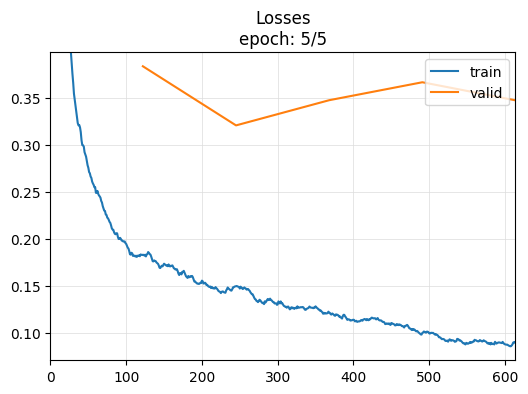

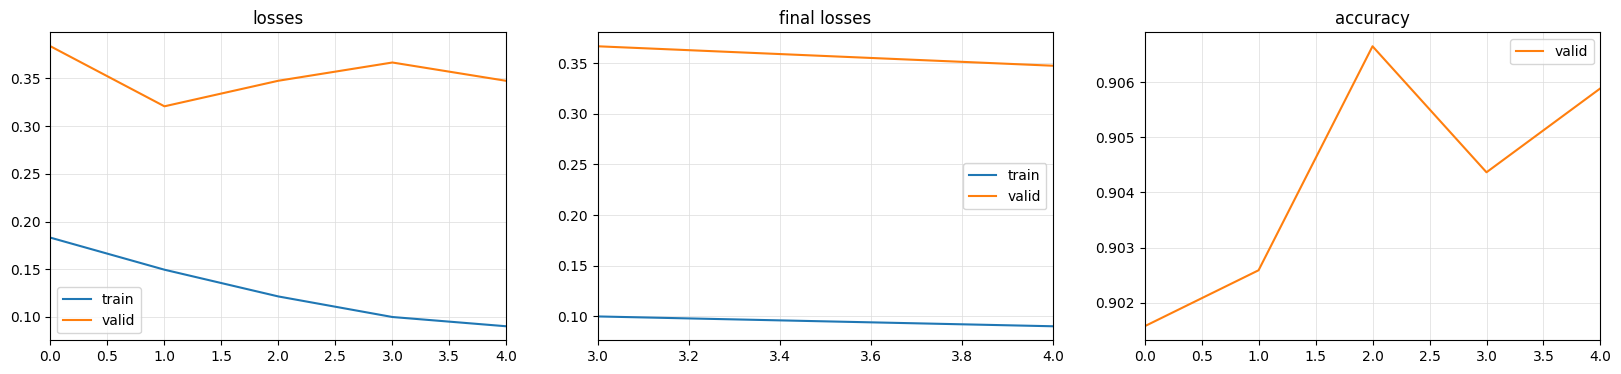

[I 2022-11-04 00:19:05,158] Trial 2 finished with value: 0.3474578857421875 and parameters: {'Learning_rate': 7.907455335133032e-08}. Best is trial 1 with value: 0.3247813880443573.


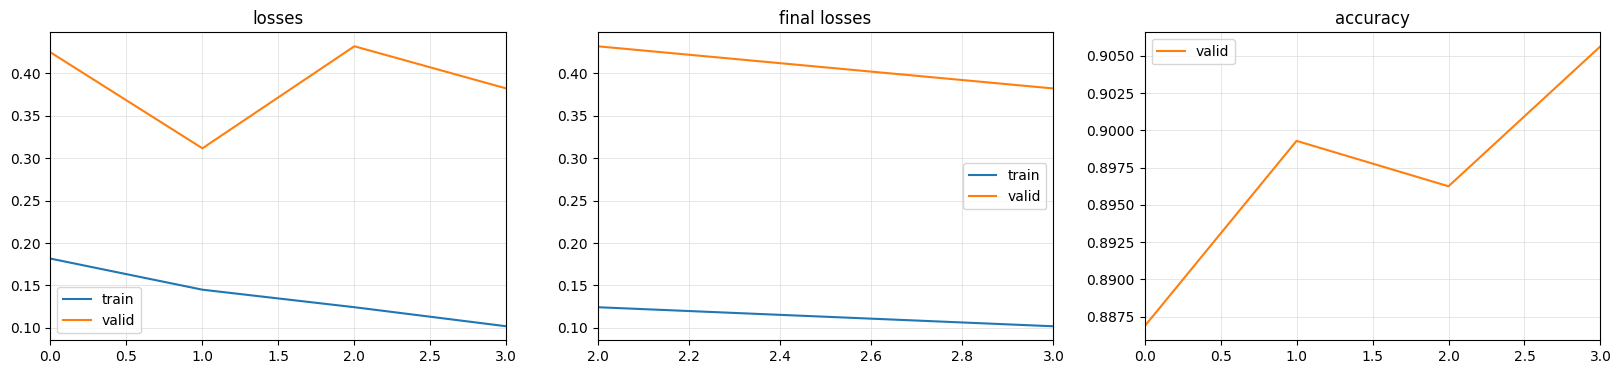

[I 2022-11-04 00:19:10,194] Trial 3 finished with value: 0.38192516565322876 and parameters: {'Learning_rate': 3.241397941474959e-07}. Best is trial 1 with value: 0.3247813880443573.


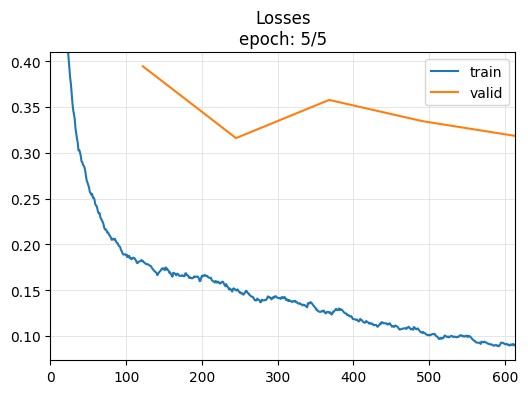

[I 2022-11-04 00:19:17,195] Trial 4 finished with value: 0.3184579014778137 and parameters: {'Learning_rate': 3.371261595668962e-08}. Best is trial 4 with value: 0.3184579014778137.


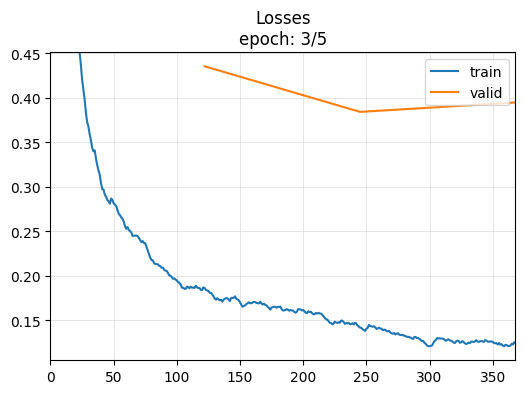

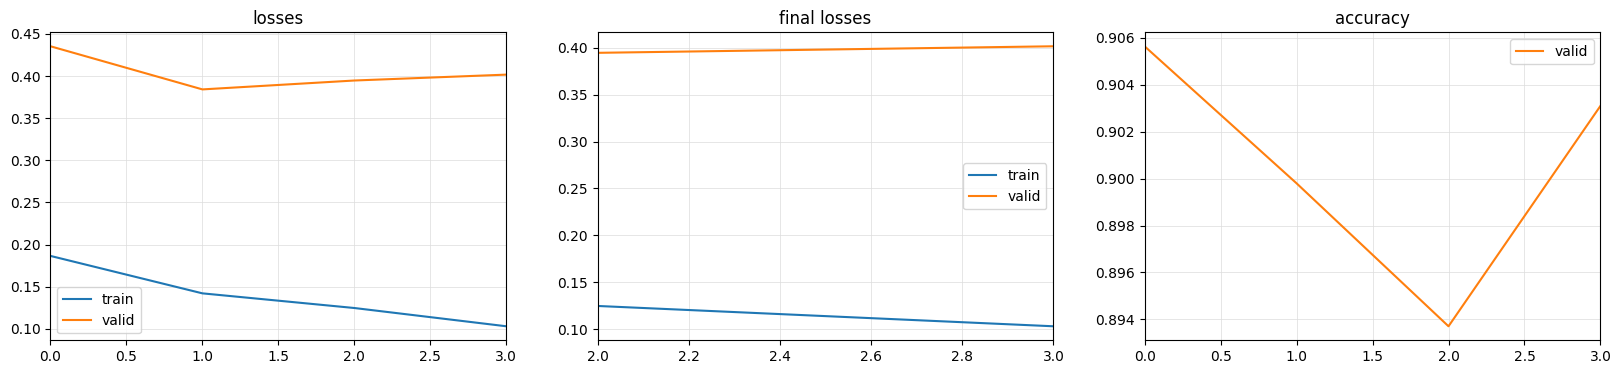

[I 2022-11-04 00:19:22,602] Trial 5 finished with value: 0.4016692638397217 and parameters: {'Learning_rate': 3.5629664323878295e-08}. Best is trial 4 with value: 0.3184579014778137.


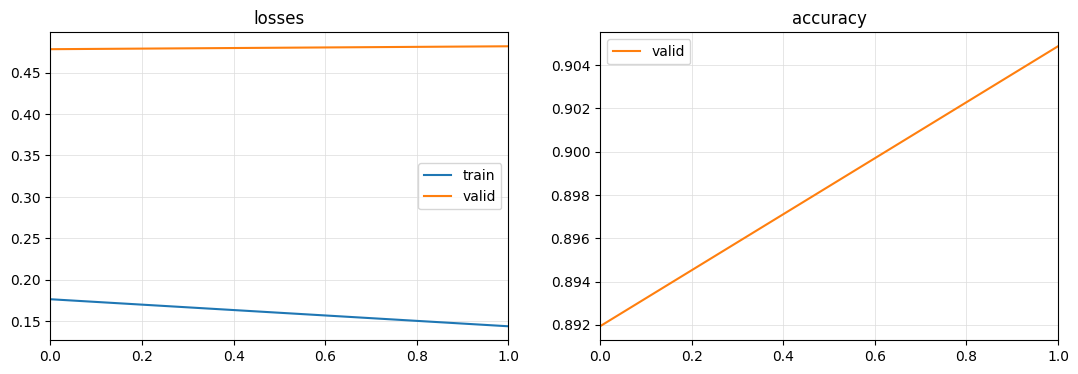

[I 2022-11-04 00:19:25,300] Trial 6 finished with value: 0.48166030645370483 and parameters: {'Learning_rate': 5.499667240790798e-08}. Best is trial 4 with value: 0.3184579014778137.


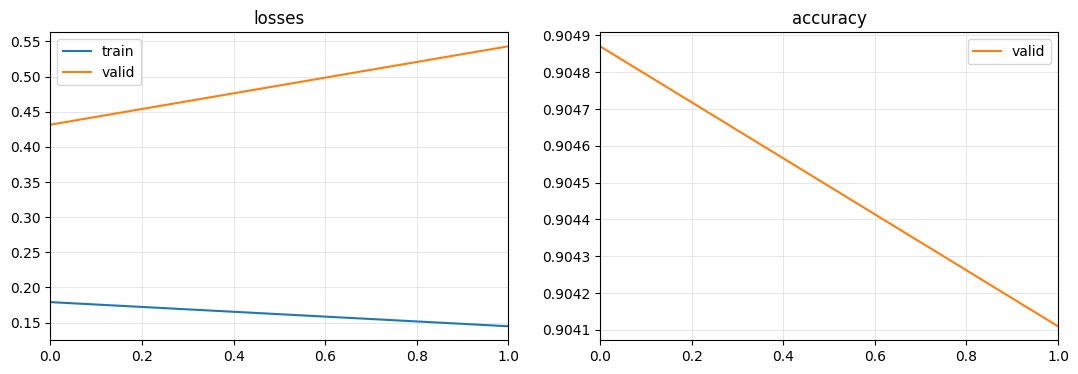

[I 2022-11-04 00:19:27,755] Trial 7 finished with value: 0.5429997444152832 and parameters: {'Learning_rate': 2.4050285488823004e-08}. Best is trial 4 with value: 0.3184579014778137.


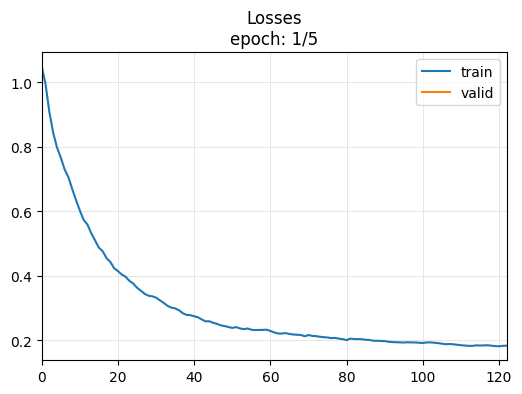

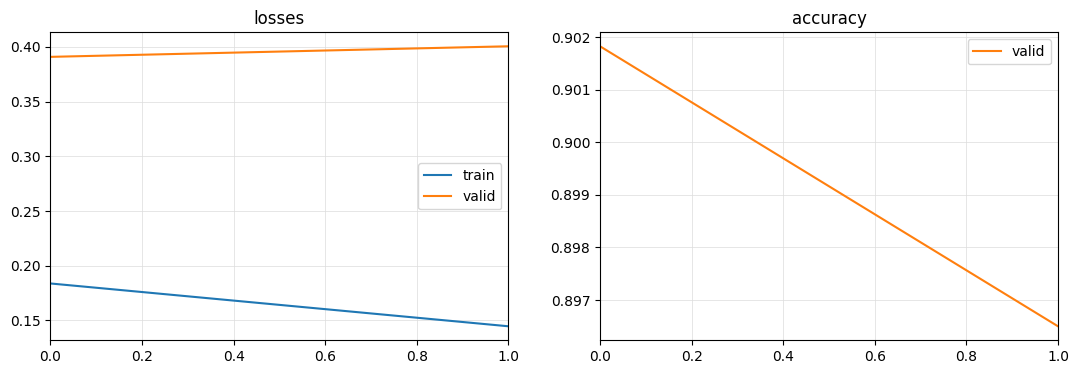

[I 2022-11-04 00:19:30,423] Trial 8 finished with value: 0.40051496028900146 and parameters: {'Learning_rate': 7.839218328185357e-08}. Best is trial 4 with value: 0.3184579014778137.


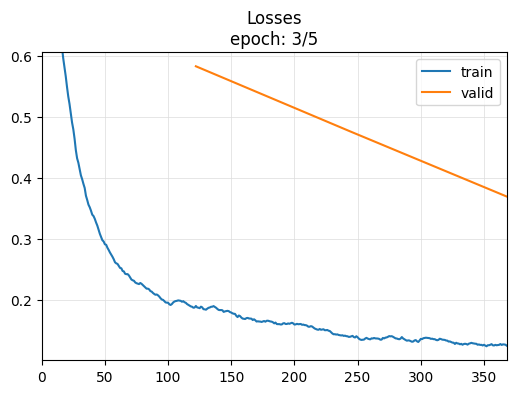

[I 2022-11-04 00:19:36,603] Trial 9 finished with value: 0.4004283845424652 and parameters: {'Learning_rate': 3.15611539105837e-07}. Best is trial 4 with value: 0.3184579014778137.


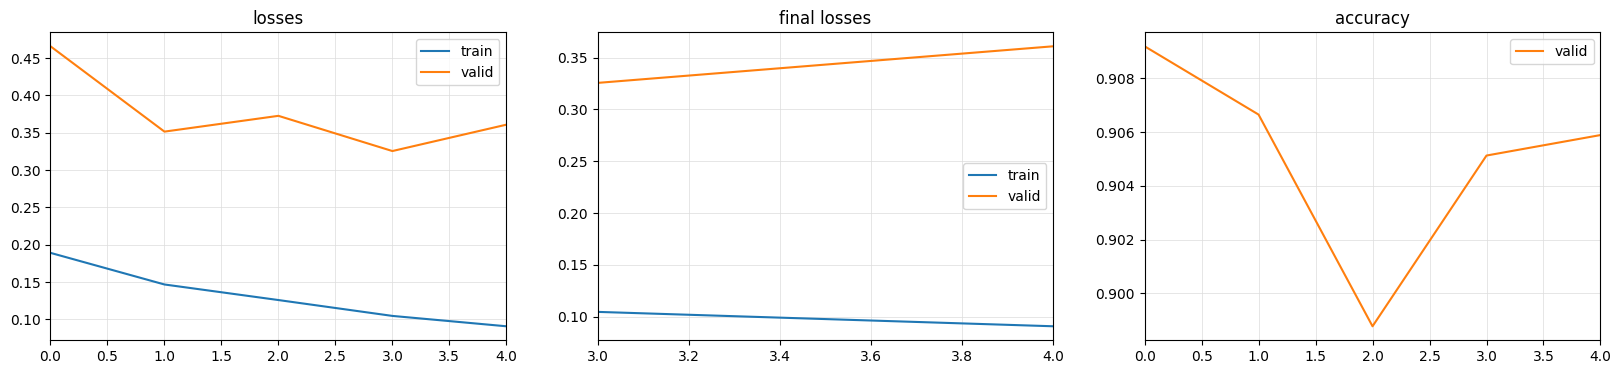

[I 2022-11-04 00:19:44,703] Trial 10 finished with value: 0.3608523905277252 and parameters: {'Learning_rate': 3.6436408190050656e-08}. Best is trial 4 with value: 0.3184579014778137.


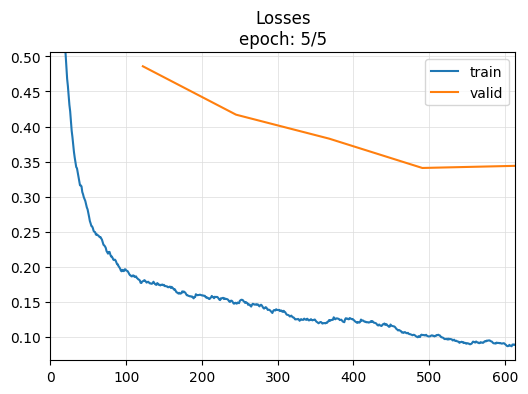

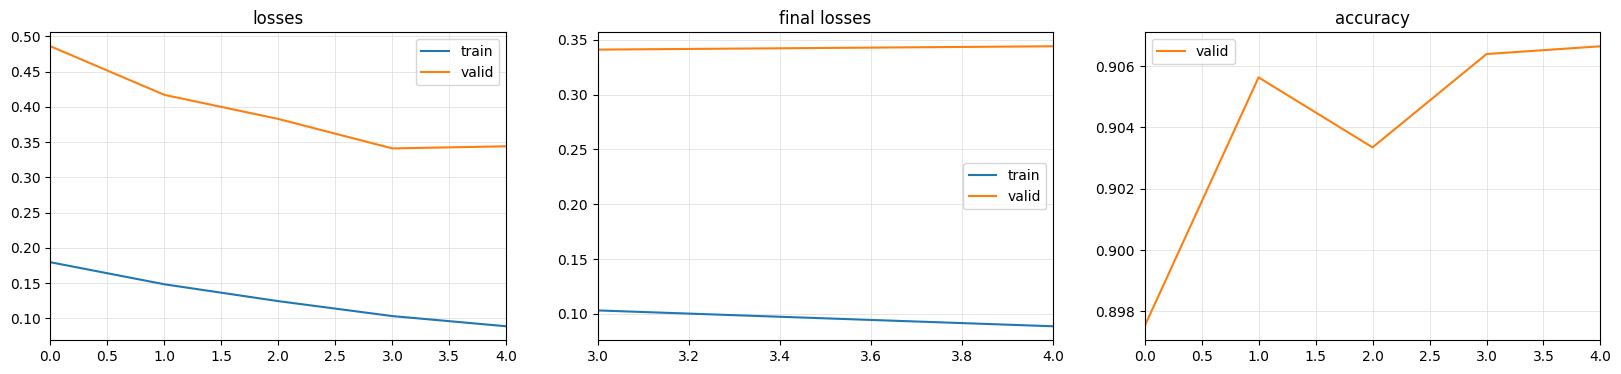

[I 2022-11-04 00:19:51,633] Trial 11 finished with value: 0.34401607513427734 and parameters: {'Learning_rate': 1.8747704207617973e-07}. Best is trial 4 with value: 0.3184579014778137.


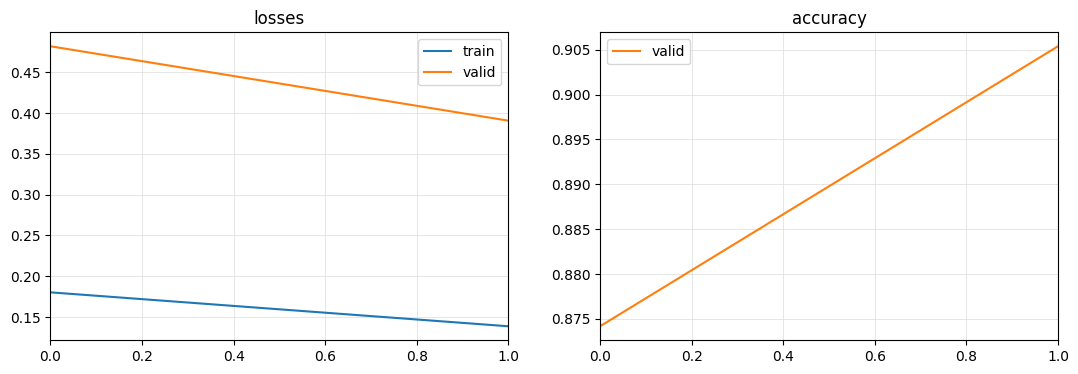

[I 2022-11-04 00:19:54,110] Trial 12 finished with value: 0.3907358944416046 and parameters: {'Learning_rate': 1.5523047902849607e-08}. Best is trial 4 with value: 0.3184579014778137.


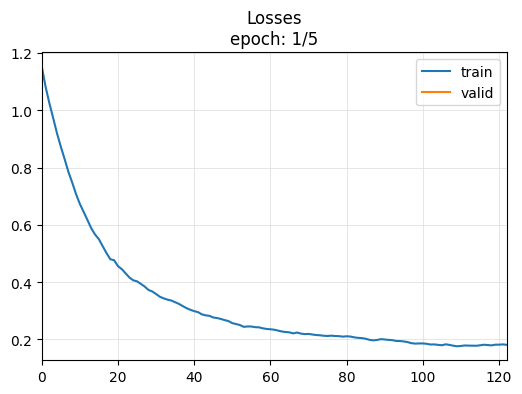

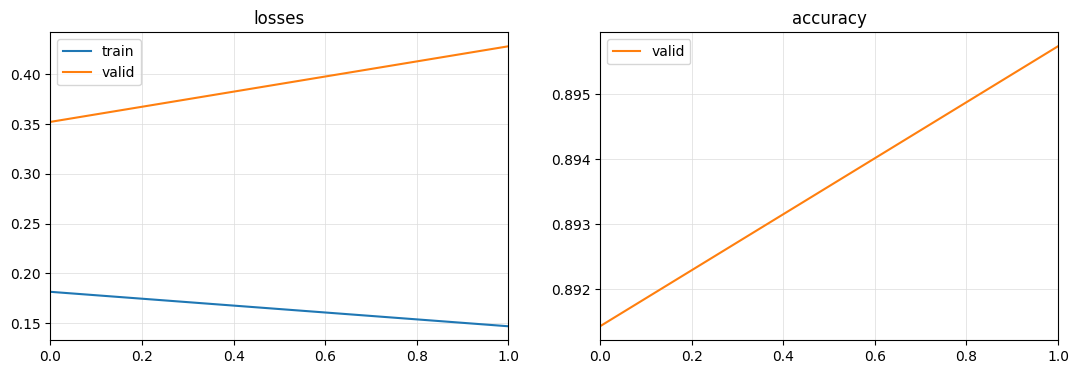

[I 2022-11-04 00:19:57,018] Trial 13 finished with value: 0.4280323088169098 and parameters: {'Learning_rate': 2.0142314839757533e-08}. Best is trial 4 with value: 0.3184579014778137.


[I 2022-11-04 00:19:59,898] Trial 14 finished with value: 0.5105085372924805 and parameters: {'Learning_rate': 1.5865482435207783e-08}. Best is trial 4 with value: 0.3184579014778137.


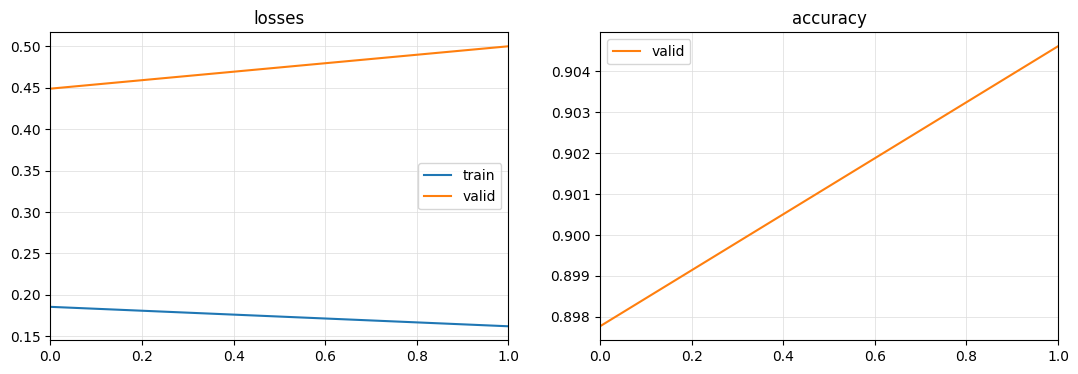

[I 2022-11-04 00:20:02,536] Trial 15 finished with value: 0.4999352693557739 and parameters: {'Learning_rate': 1.62426956637687e-07}. Best is trial 4 with value: 0.3184579014778137.


[I 2022-11-04 00:20:04,988] Trial 16 finished with value: 0.45986849069595337 and parameters: {'Learning_rate': 9.429582650014184e-08}. Best is trial 4 with value: 0.3184579014778137.


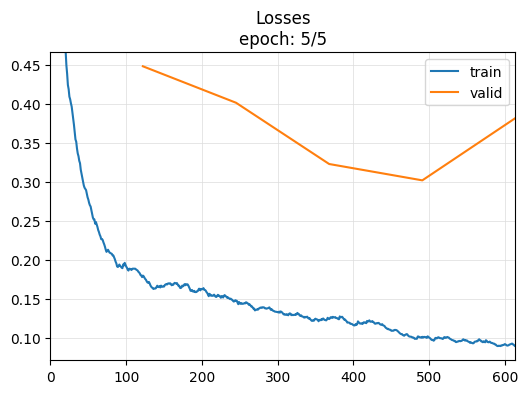

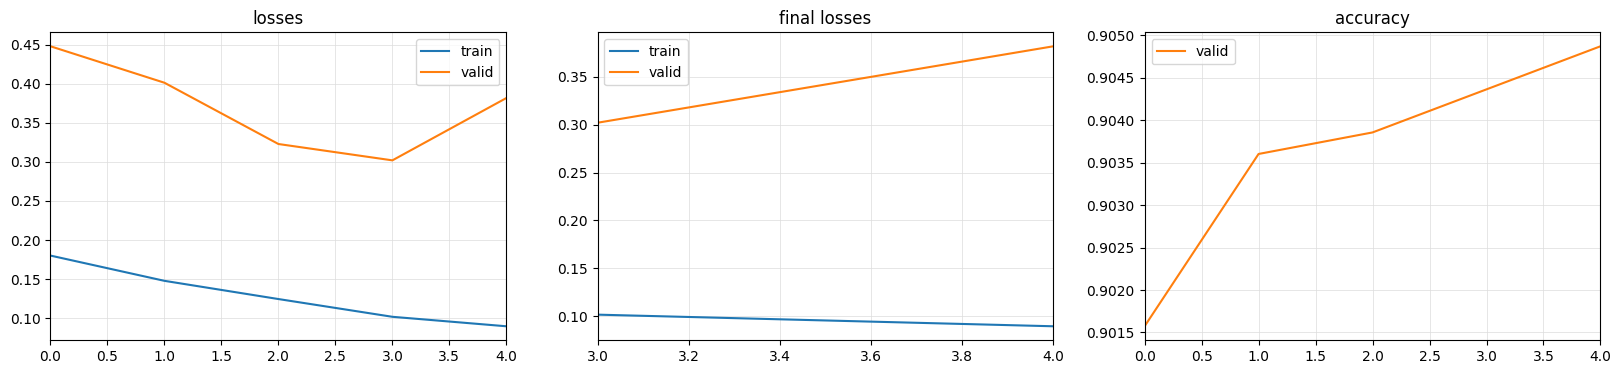

[I 2022-11-04 00:20:11,354] Trial 17 finished with value: 0.38175126910209656 and parameters: {'Learning_rate': 4.434495773007505e-08}. Best is trial 4 with value: 0.3184579014778137.


[I 2022-11-04 00:20:18,151] Trial 18 finished with value: 0.4037728011608124 and parameters: {'Learning_rate': 2.926352013950443e-07}. Best is trial 4 with value: 0.3184579014778137.


[I 2022-11-04 00:20:22,906] Trial 19 finished with value: 0.4568469226360321 and parameters: {'Learning_rate': 5.8775965623365e-07}. Best is trial 4 with value: 0.3184579014778137.


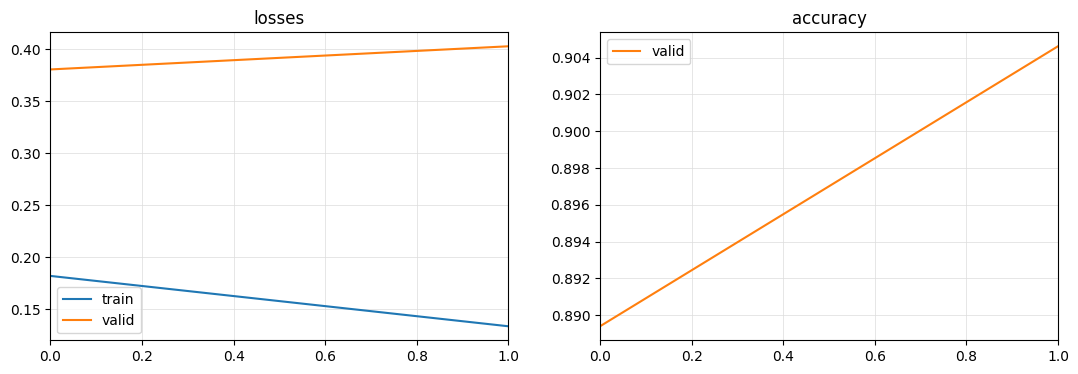

[I 2022-11-04 00:20:25,647] Trial 20 finished with value: 0.4027899503707886 and parameters: {'Learning_rate': 9.297297611681995e-07}. Best is trial 4 with value: 0.3184579014778137.


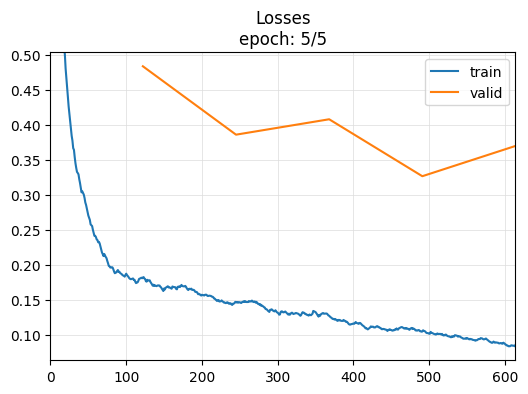

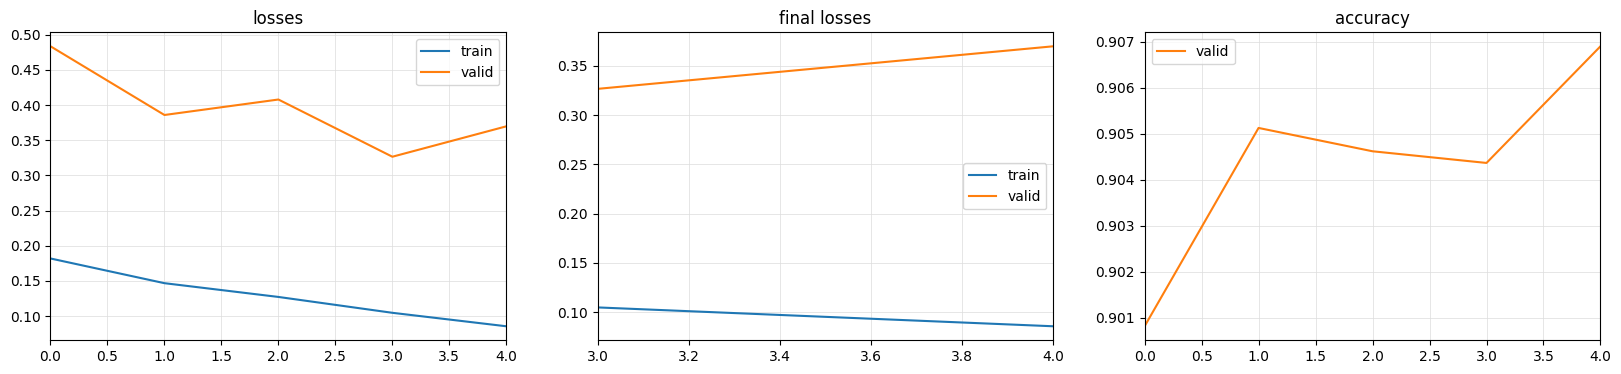

[I 2022-11-04 00:20:32,976] Trial 21 finished with value: 0.36974000930786133 and parameters: {'Learning_rate': 4.982184394539197e-08}. Best is trial 4 with value: 0.3184579014778137.


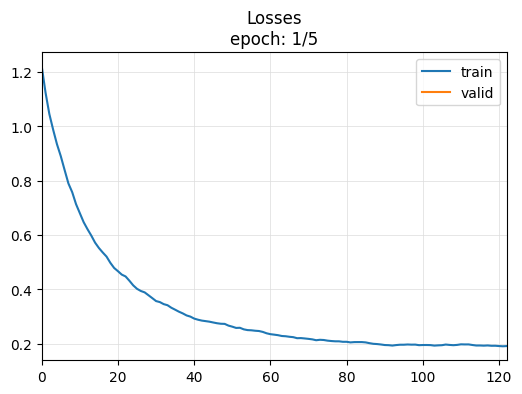

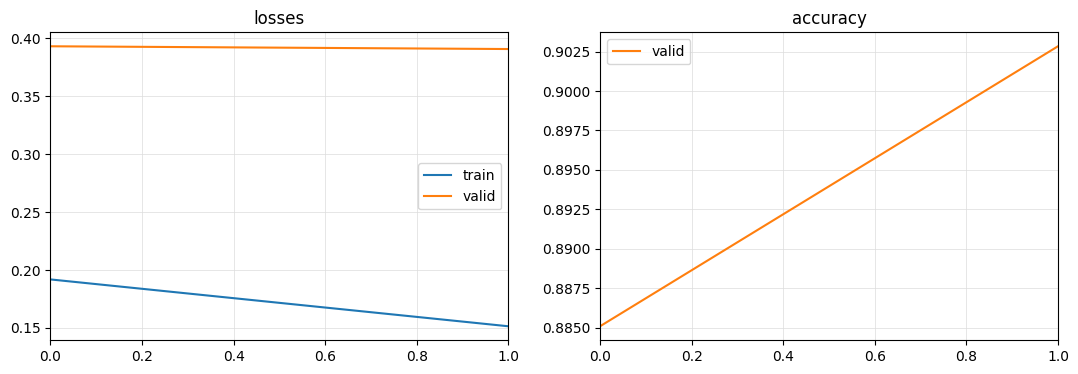

[I 2022-11-04 00:20:35,759] Trial 22 finished with value: 0.3908216953277588 and parameters: {'Learning_rate': 3.2626767295319444e-07}. Best is trial 4 with value: 0.3184579014778137.


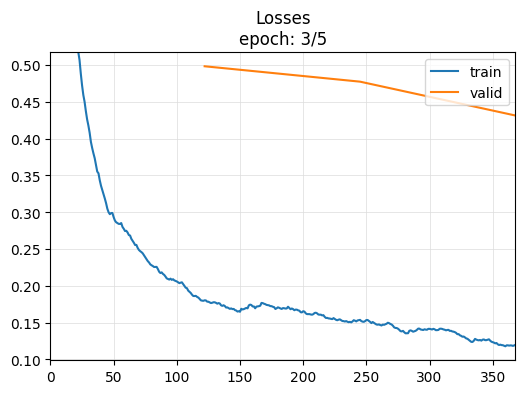

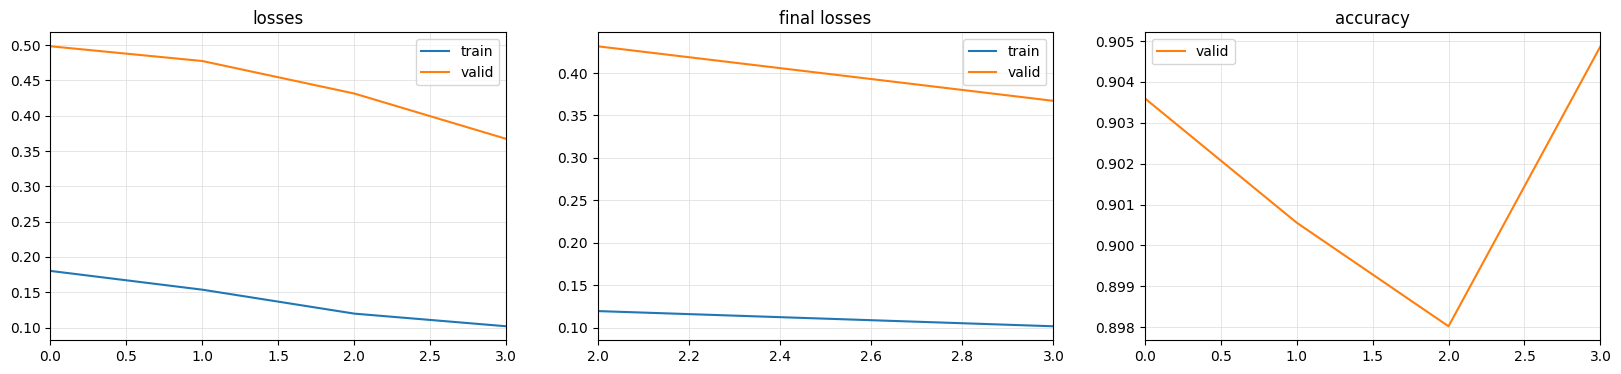

[I 2022-11-04 00:20:42,043] Trial 23 finished with value: 0.36716216802597046 and parameters: {'Learning_rate': 3.3007164285506644e-07}. Best is trial 4 with value: 0.3184579014778137.


[I 2022-11-04 00:20:44,753] Trial 24 finished with value: 0.43367332220077515 and parameters: {'Learning_rate': 3.3448178713337584e-08}. Best is trial 4 with value: 0.3184579014778137.


[I 2022-11-04 00:20:50,407] Trial 25 finished with value: 0.38256481289863586 and parameters: {'Learning_rate': 1.720824636052193e-08}. Best is trial 4 with value: 0.3184579014778137.


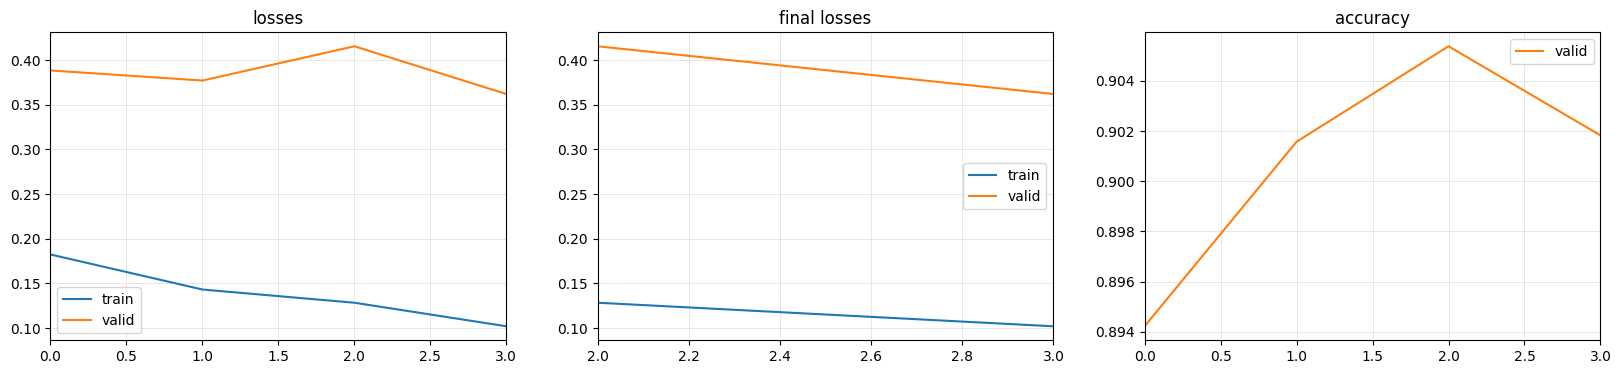

[I 2022-11-04 00:20:57,030] Trial 26 finished with value: 0.361934632062912 and parameters: {'Learning_rate': 1.3952963041408153e-08}. Best is trial 4 with value: 0.3184579014778137.


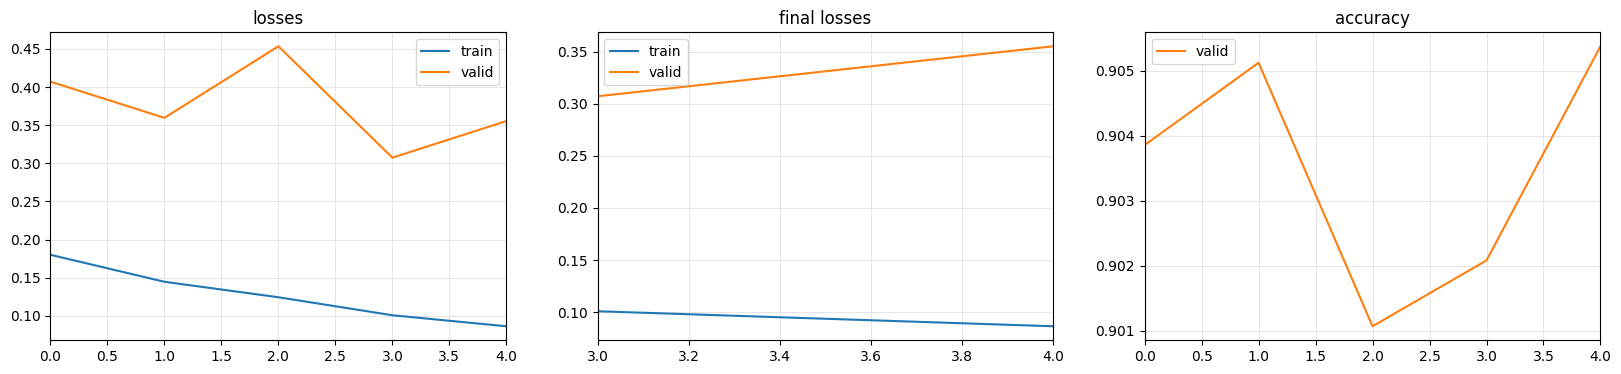

[I 2022-11-04 00:21:05,463] Trial 27 finished with value: 0.3553728461265564 and parameters: {'Learning_rate': 1.766169425665175e-07}. Best is trial 4 with value: 0.3184579014778137.


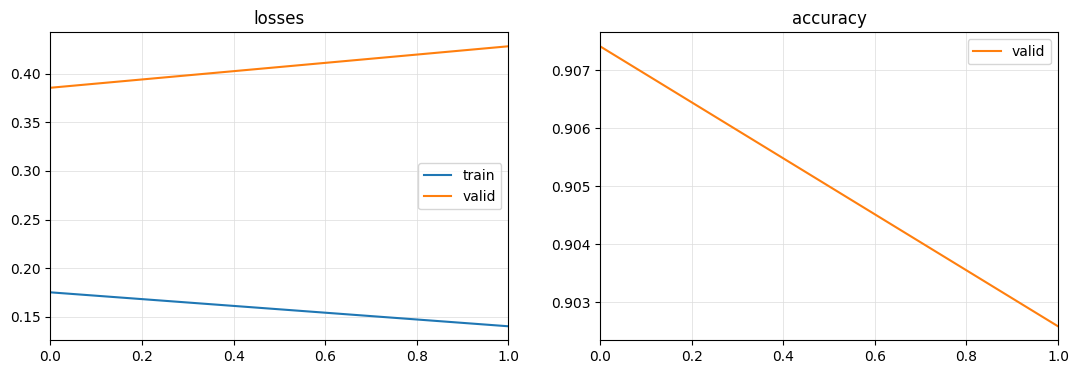

[I 2022-11-04 00:21:07,906] Trial 28 finished with value: 0.428007572889328 and parameters: {'Learning_rate': 1.079912314530205e-08}. Best is trial 4 with value: 0.3184579014778137.


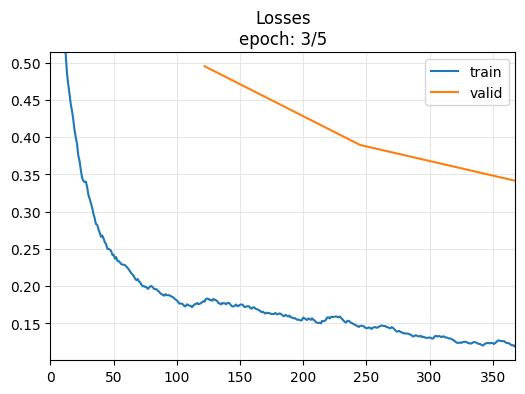

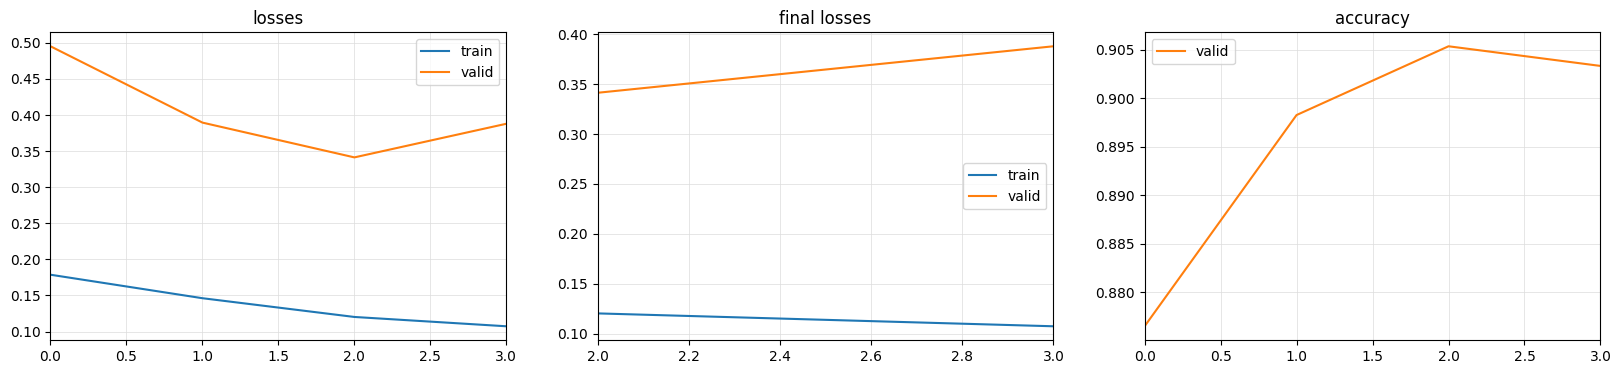

[I 2022-11-04 00:21:13,168] Trial 29 finished with value: 0.38785597681999207 and parameters: {'Learning_rate': 1.5003589108264088e-07}. Best is trial 4 with value: 0.3184579014778137.


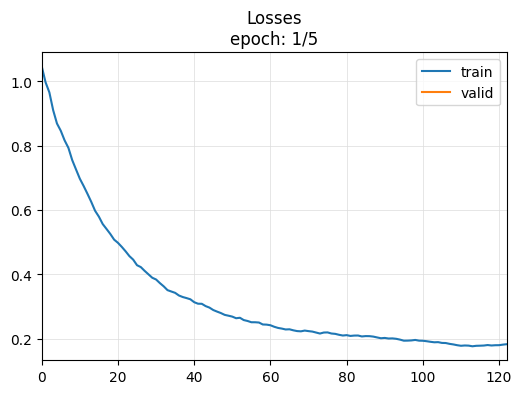

[I 2022-11-04 00:21:15,848] Trial 30 finished with value: 0.46922922134399414 and parameters: {'Learning_rate': 1.6968572168276183e-07}. Best is trial 4 with value: 0.3184579014778137.


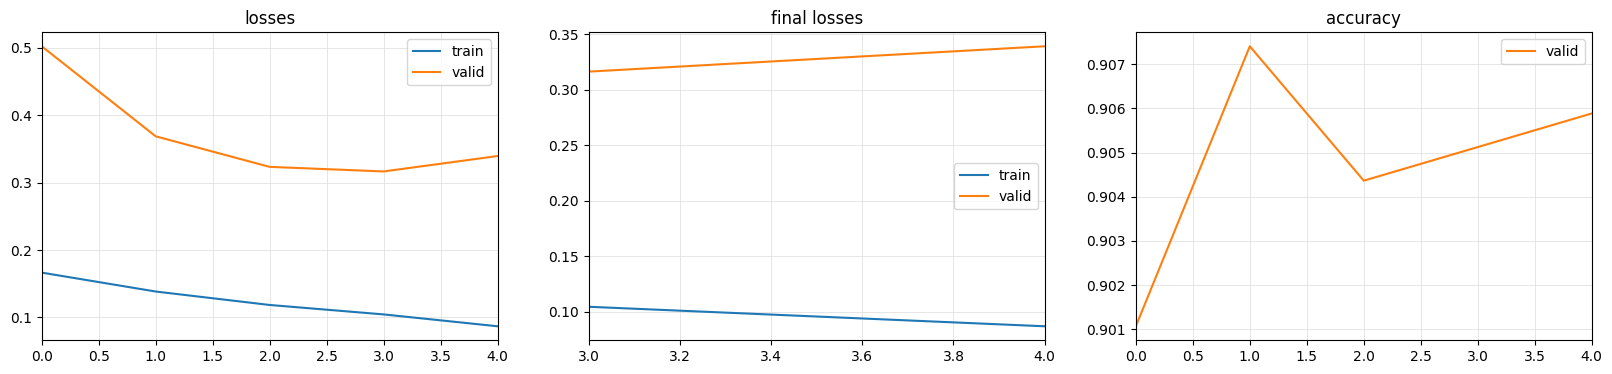

[I 2022-11-04 00:21:23,353] Trial 31 finished with value: 0.3393627107143402 and parameters: {'Learning_rate': 3.893318975638648e-08}. Best is trial 4 with value: 0.3184579014778137.


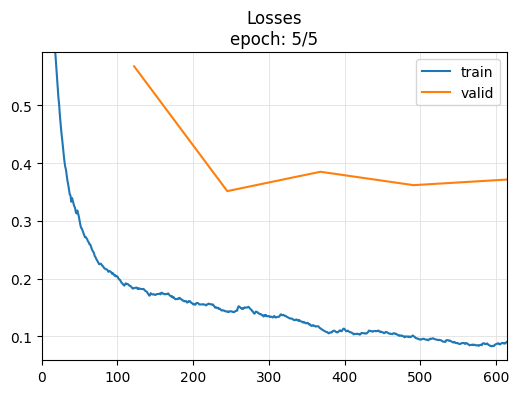

[I 2022-11-04 00:21:31,923] Trial 32 finished with value: 0.371631383895874 and parameters: {'Learning_rate': 8.800802548058424e-07}. Best is trial 4 with value: 0.3184579014778137.


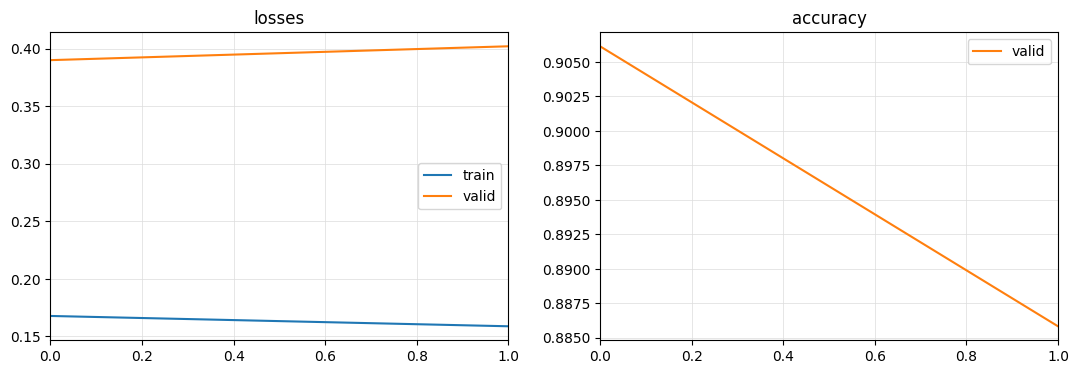

[I 2022-11-04 00:21:35,004] Trial 33 finished with value: 0.4022902250289917 and parameters: {'Learning_rate': 9.382119126465944e-07}. Best is trial 4 with value: 0.3184579014778137.


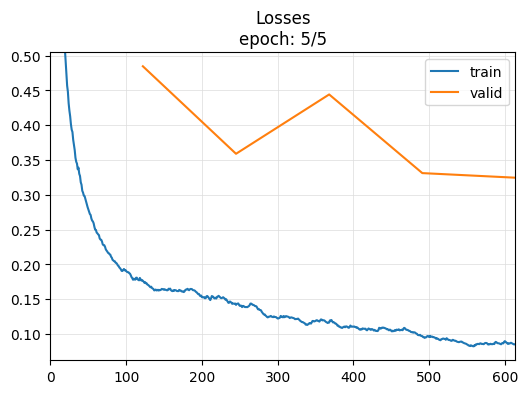

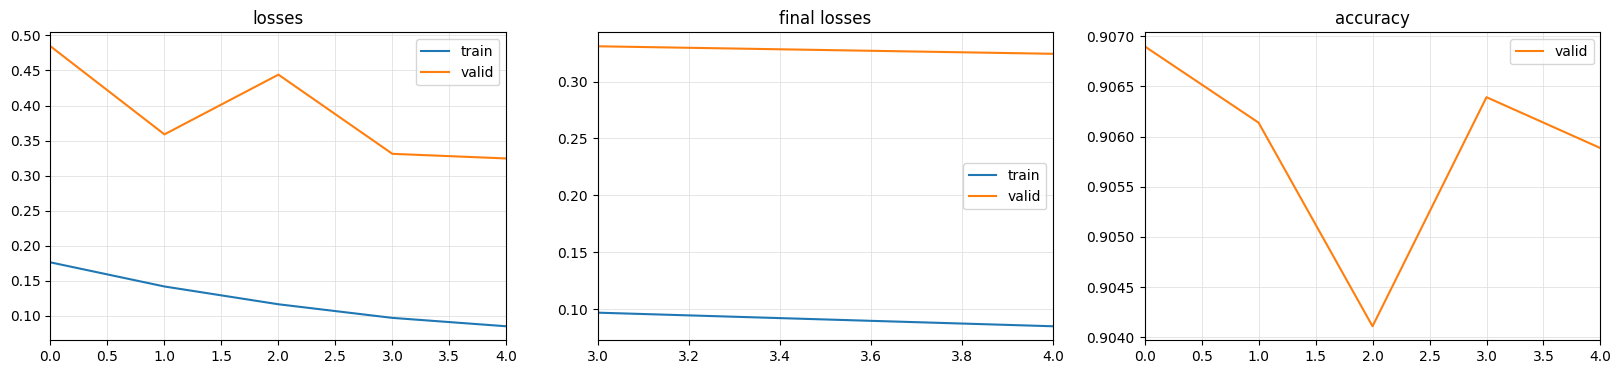

[I 2022-11-04 00:21:42,737] Trial 34 finished with value: 0.32444673776626587 and parameters: {'Learning_rate': 1.0799886840899945e-07}. Best is trial 4 with value: 0.3184579014778137.


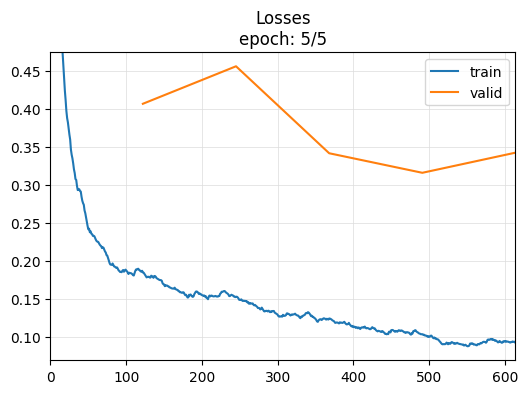

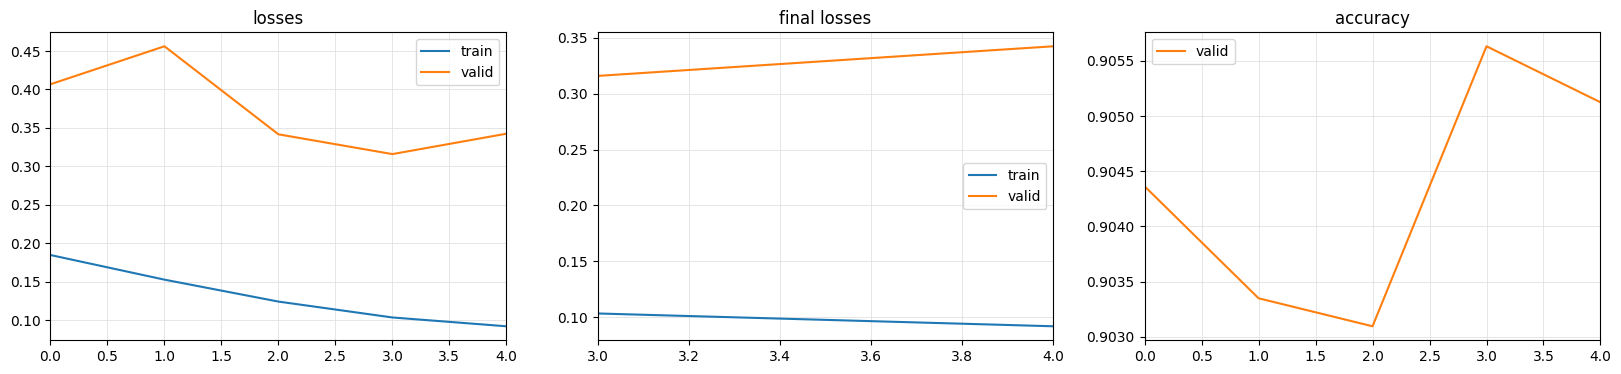

[I 2022-11-04 00:21:49,336] Trial 35 finished with value: 0.34242573380470276 and parameters: {'Learning_rate': 7.089768211334556e-08}. Best is trial 4 with value: 0.3184579014778137.


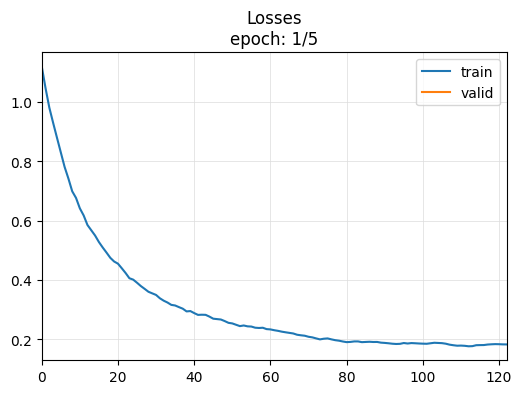

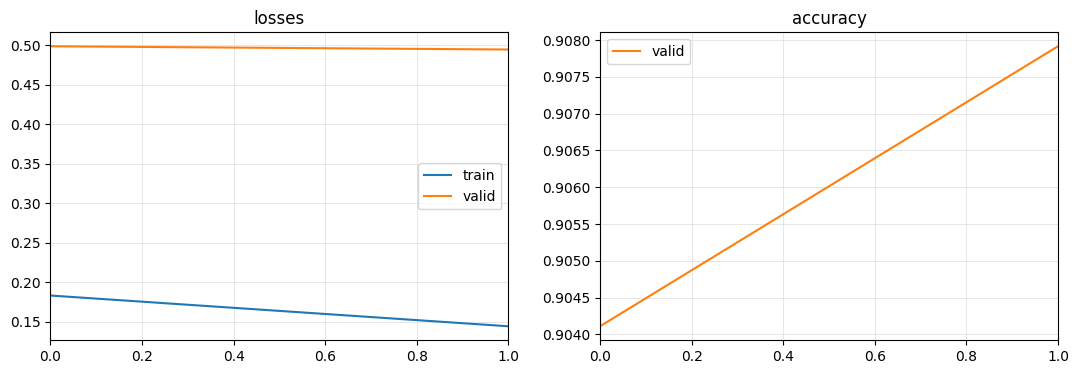

[I 2022-11-04 00:21:51,790] Trial 36 finished with value: 0.4944973587989807 and parameters: {'Learning_rate': 3.7667076862466146e-08}. Best is trial 4 with value: 0.3184579014778137.


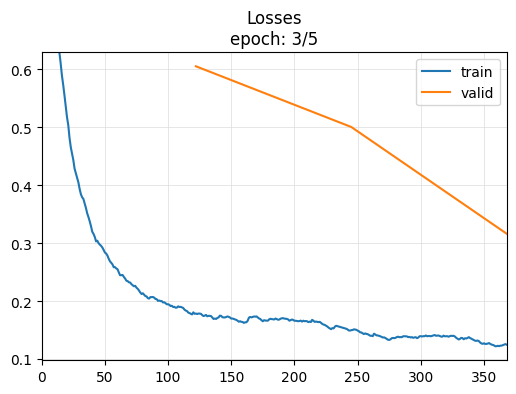

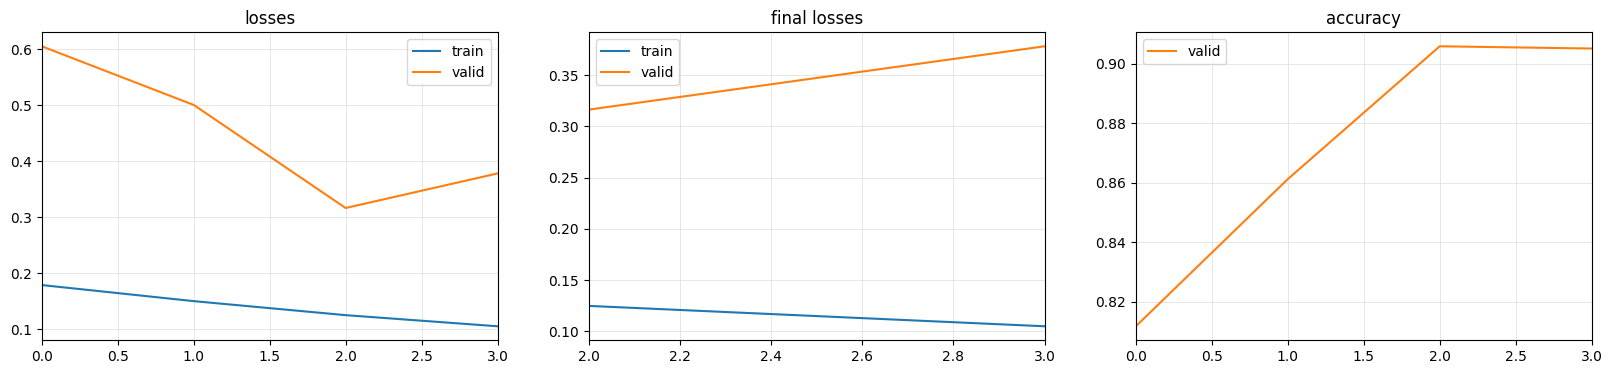

[I 2022-11-04 00:21:58,013] Trial 37 finished with value: 0.37803056836128235 and parameters: {'Learning_rate': 1.0879966531824705e-08}. Best is trial 4 with value: 0.3184579014778137.


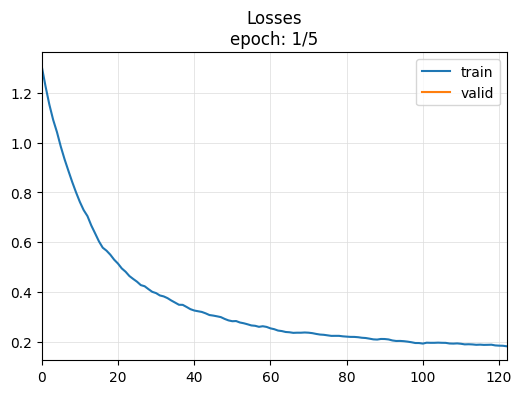

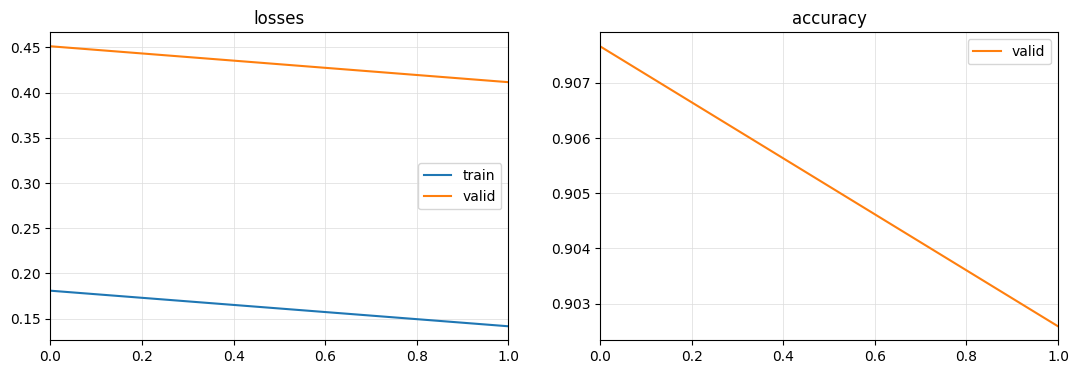

[I 2022-11-04 00:22:01,243] Trial 38 finished with value: 0.4115524888038635 and parameters: {'Learning_rate': 3.2634631447722835e-08}. Best is trial 4 with value: 0.3184579014778137.


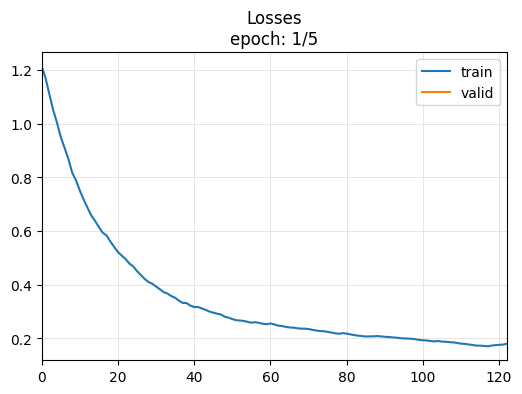

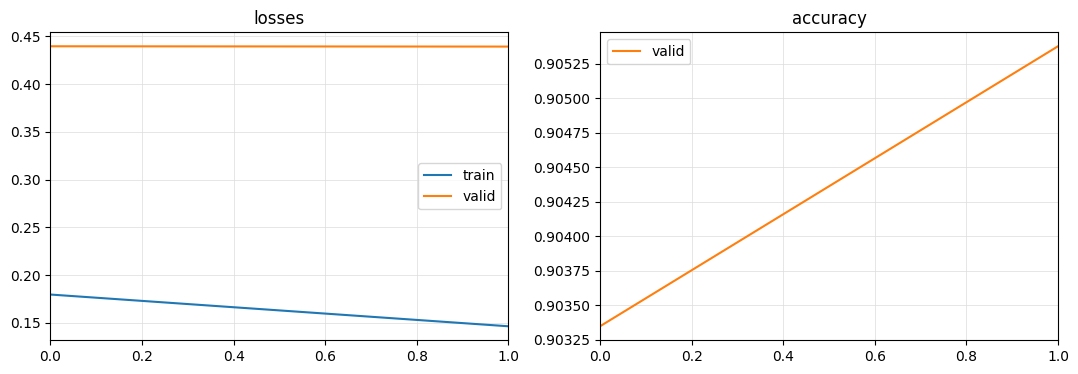

[I 2022-11-04 00:22:04,106] Trial 39 finished with value: 0.43927857279777527 and parameters: {'Learning_rate': 6.381055777859947e-08}. Best is trial 4 with value: 0.3184579014778137.


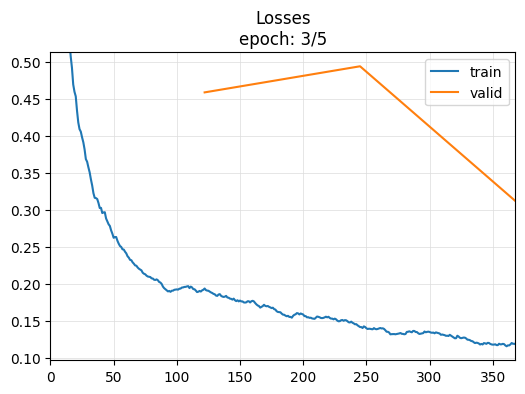

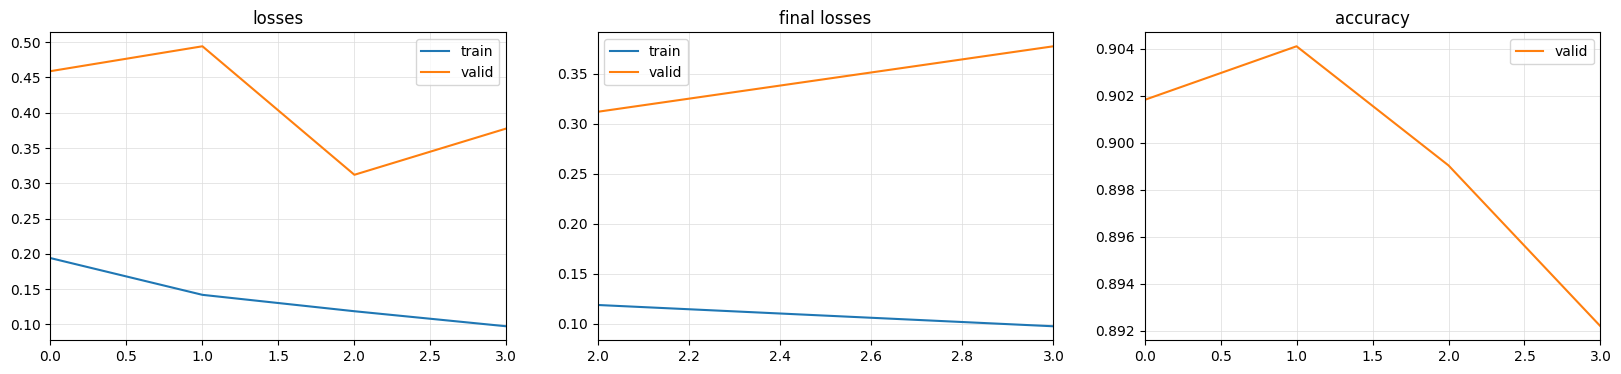

[I 2022-11-04 00:22:09,489] Trial 40 finished with value: 0.37758535146713257 and parameters: {'Learning_rate': 2.3073706965868177e-08}. Best is trial 4 with value: 0.3184579014778137.


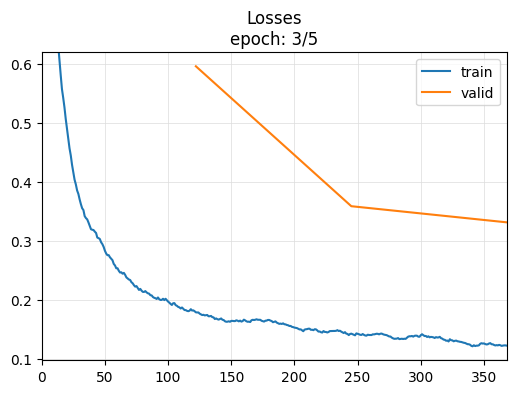

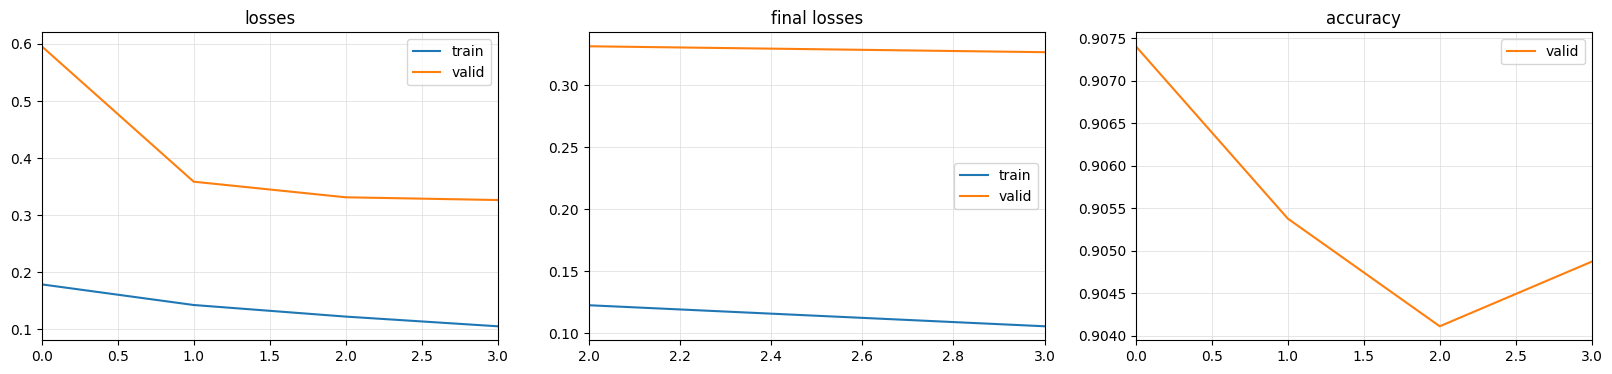

[I 2022-11-04 00:22:16,281] Trial 41 finished with value: 0.3266172409057617 and parameters: {'Learning_rate': 1.1941604889640004e-07}. Best is trial 4 with value: 0.3184579014778137.


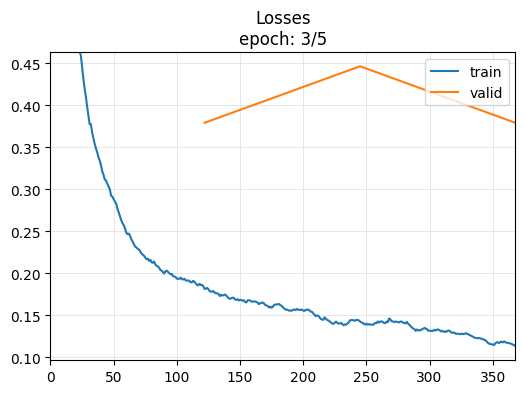

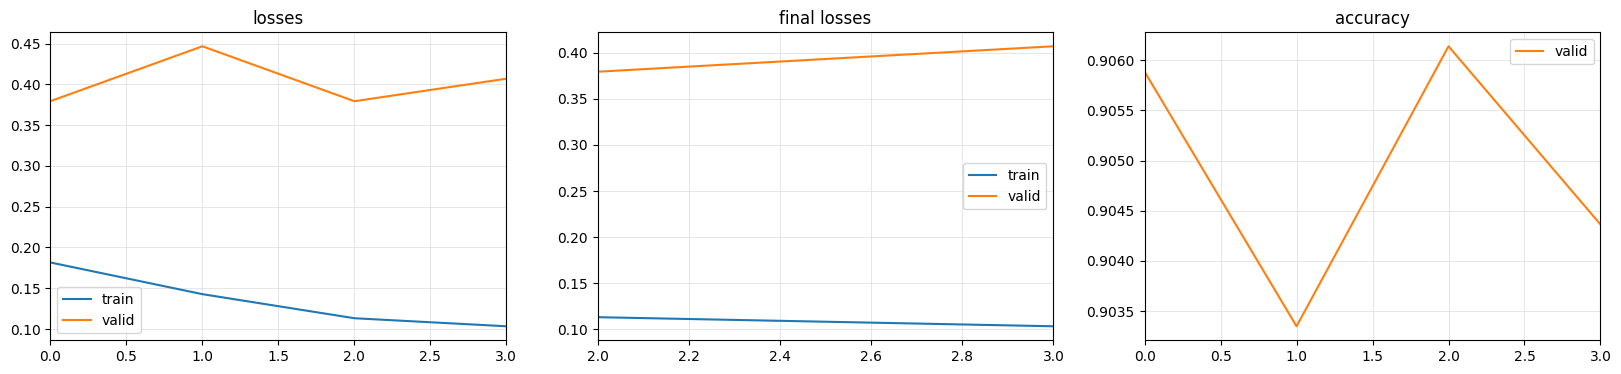

[I 2022-11-04 00:22:21,361] Trial 42 finished with value: 0.40687593817710876 and parameters: {'Learning_rate': 1.2721151543355032e-07}. Best is trial 4 with value: 0.3184579014778137.


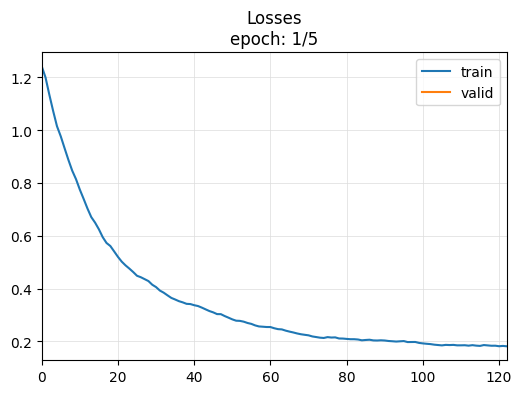

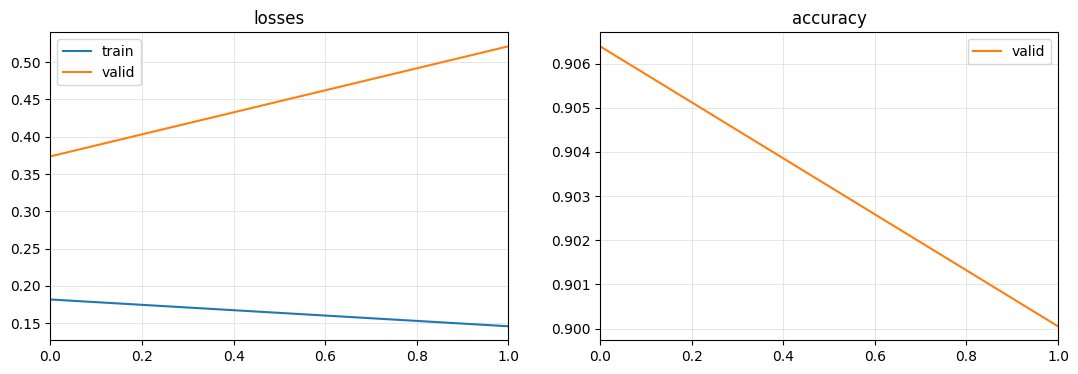

[I 2022-11-04 00:22:23,959] Trial 43 finished with value: 0.521291971206665 and parameters: {'Learning_rate': 3.9699347790561806e-07}. Best is trial 4 with value: 0.3184579014778137.


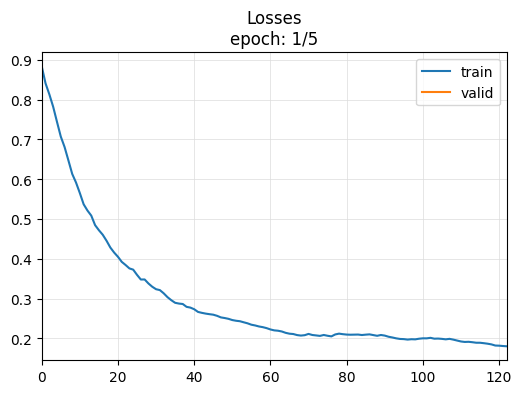

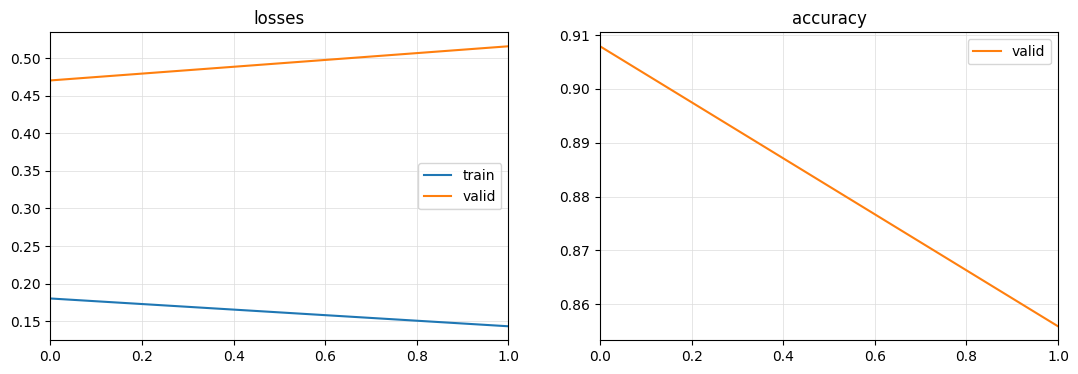

[I 2022-11-04 00:22:27,153] Trial 44 finished with value: 0.5157866477966309 and parameters: {'Learning_rate': 1.1470102121346372e-07}. Best is trial 4 with value: 0.3184579014778137.


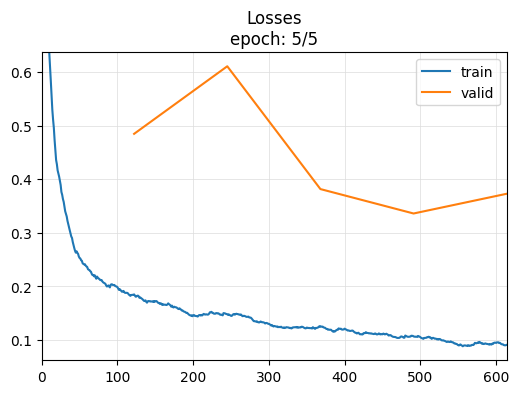

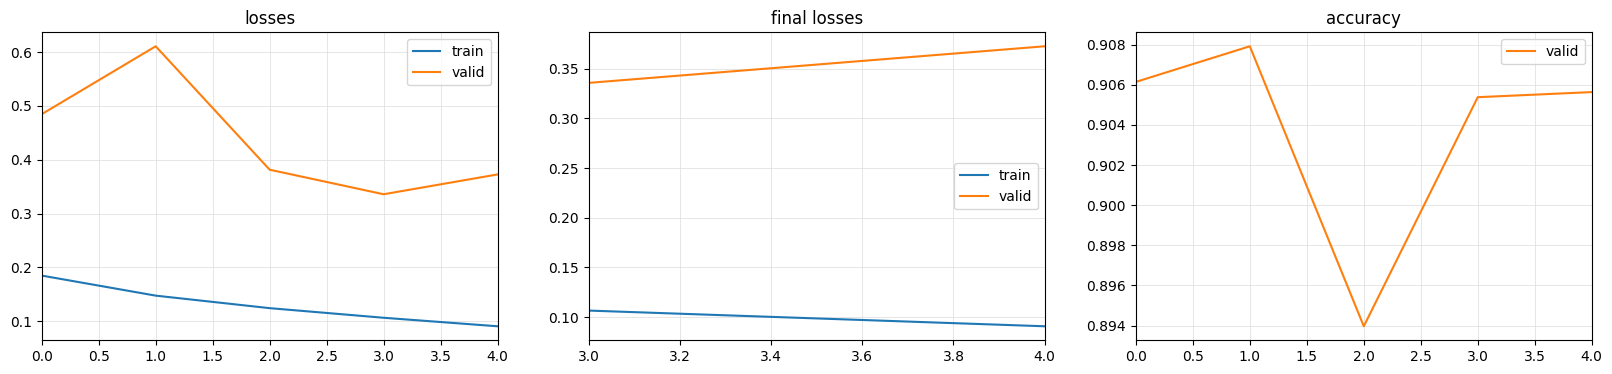

[I 2022-11-04 00:22:35,468] Trial 45 finished with value: 0.37265193462371826 and parameters: {'Learning_rate': 5.769895064499068e-08}. Best is trial 4 with value: 0.3184579014778137.


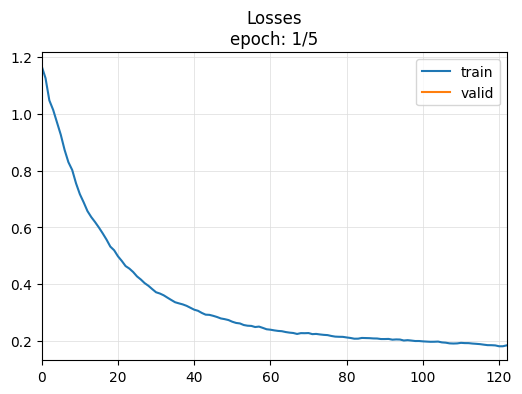

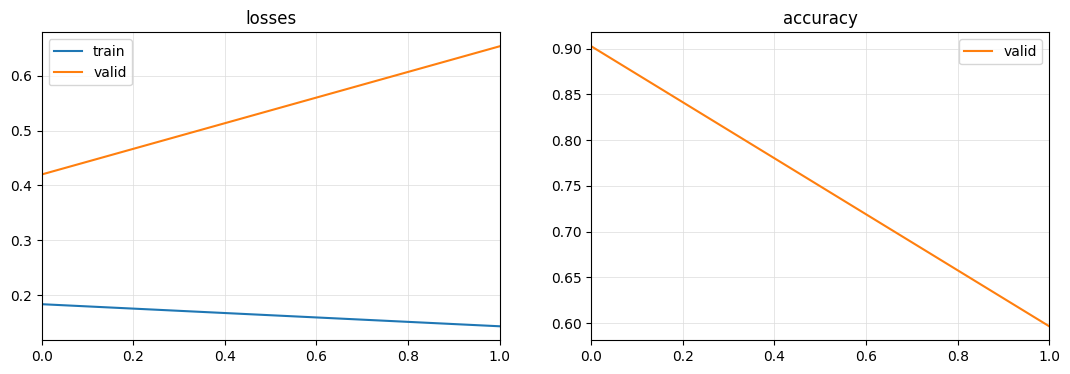

[I 2022-11-04 00:22:38,174] Trial 46 finished with value: 0.6532247066497803 and parameters: {'Learning_rate': 4.978367630423623e-07}. Best is trial 4 with value: 0.3184579014778137.


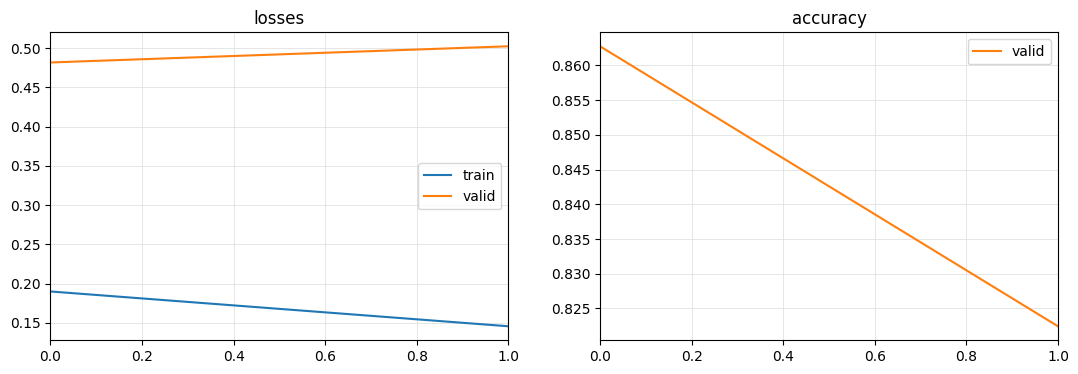

[I 2022-11-04 00:22:40,898] Trial 47 finished with value: 0.5023460388183594 and parameters: {'Learning_rate': 2.591710601481775e-07}. Best is trial 4 with value: 0.3184579014778137.


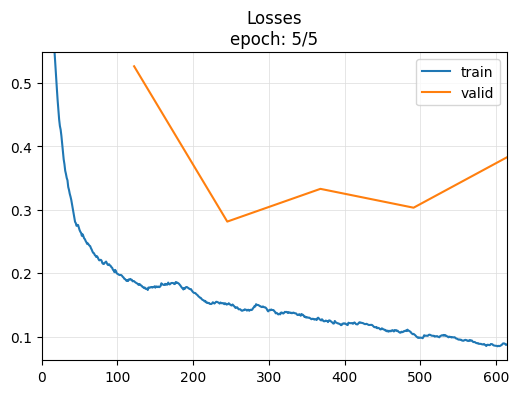

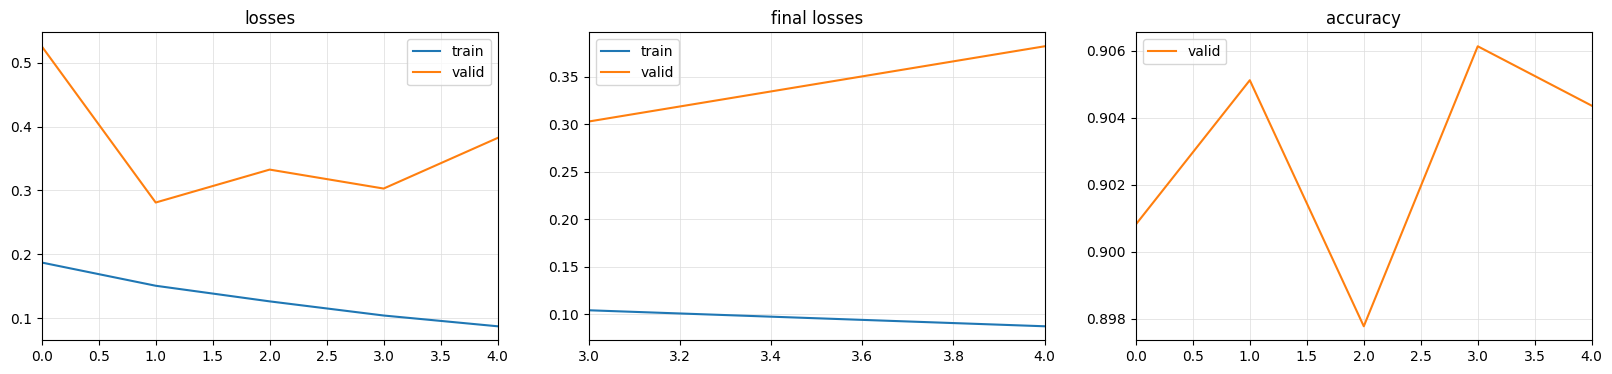

[I 2022-11-04 00:22:47,459] Trial 48 finished with value: 0.38229700922966003 and parameters: {'Learning_rate': 6.977328033333805e-07}. Best is trial 4 with value: 0.3184579014778137.


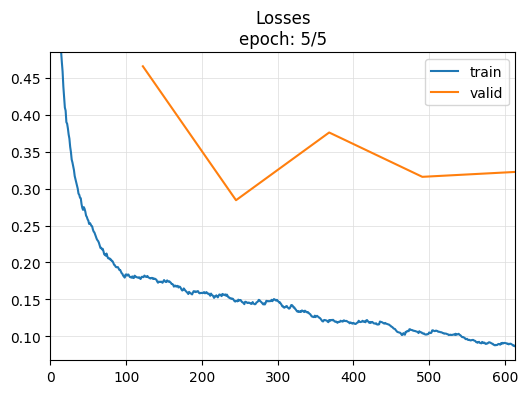

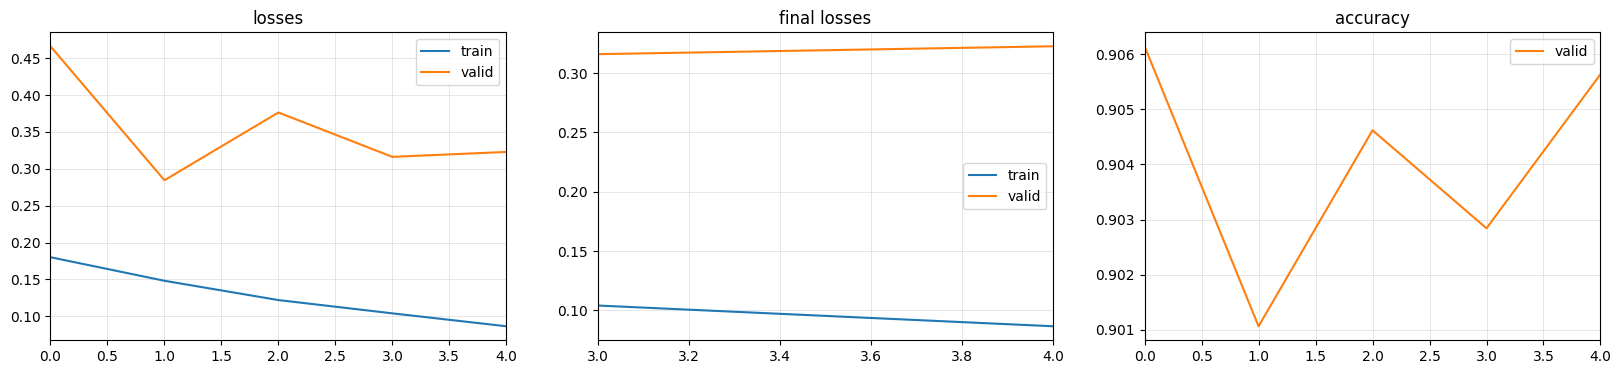

[I 2022-11-04 00:22:55,404] Trial 49 finished with value: 0.3227585256099701 and parameters: {'Learning_rate': 5.670987141986113e-08}. Best is trial 4 with value: 0.3184579014778137.


In [41]:
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=num_optuna_trials, show_progress_bar=True)

In [42]:
print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Study statistics: 
  Number of finished trials:  50
Best trial:
  Value:  0.3184579014778137
  Params: 
    Learning_rate: 3.371261595668962e-08


SuggestedLRs(valley=0.009120108559727669)

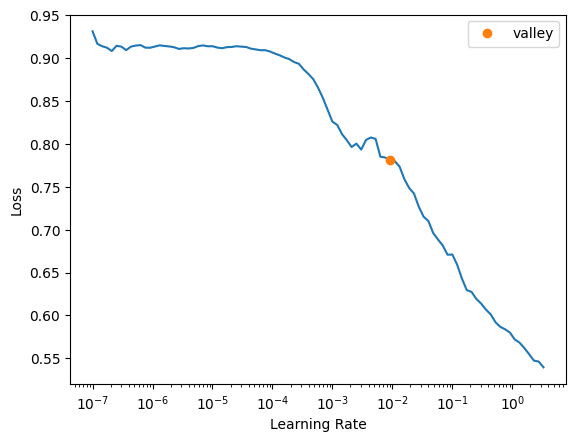

In [63]:
mv_clf.lr_find()

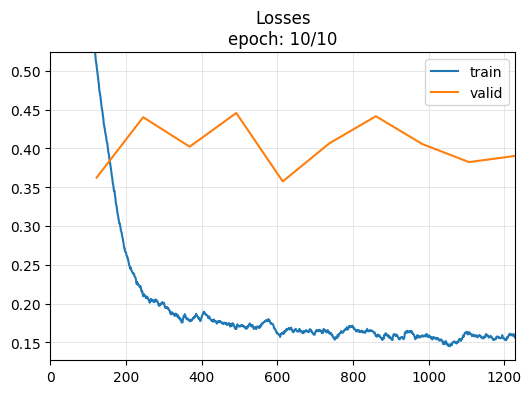

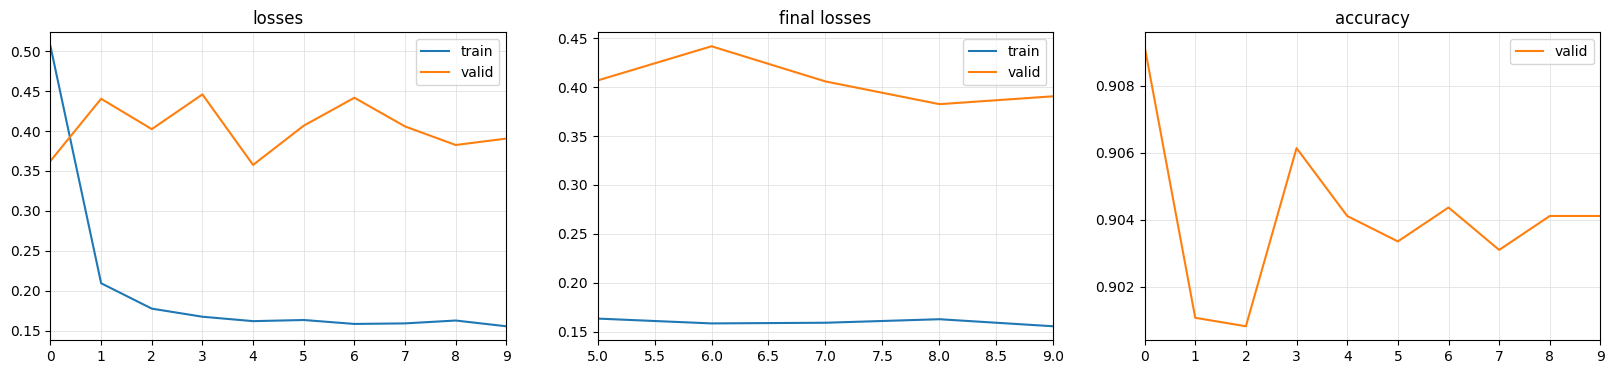

Time:  5.429603516124189


In [70]:
import timeit

start = timeit.default_timer()



 
mv_clf = TSClassifier(X, y, splits=splits, lr=1e-5,path='models', arch=LSTMPlus , batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
mv_clf.fit_one_cycle(10)
stop = timeit.default_timer()

print('Time: ', stop - start) 